# Week 6 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [186]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [ ]:
#For Exercise 1 I will try the five different datasets
#I will use two different noise variables = noise .2 and noise .5
#I classify all 10 datasets below
#My findings and conclusion can be found directly under 'Exercise 1'

In [ ]:
#Bayes
clf_bayes = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf_svm_l = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
clf_svm_p = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf_knc = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf_reg = sklearn.linear_model.LogisticRegression()

#Symbolists
clf_DT = sklearn.tree.DecisionTreeClassifier()
clf_RF = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf_nn = sklearn.neural_network.MLPClassifier()

#Ensemble
clf_GB = sklearn.ensemble.GradientBoostingClassifier()

In [ ]:
#Dataset 1: andSplit, noise = .2

In [204]:
noise_1 = .2
dfTrain_1, dfTest_1 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise_1))

In [206]:
clf_bayes.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_svm_l.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_svm_p.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_knc.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_reg.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_DT.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_RF.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_nn.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])
clf_GB.fit(np.stack(dfTrain_1['vect'], axis=0), dfTrain_1['category'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [207]:
display(lucem_illud.evaluateClassifier(clf_bayes, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_svm_l, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_svm_p, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_knc, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_reg, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_DT, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_RF, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_nn, dfTest_1))
display(lucem_illud.evaluateClassifier(clf_GB, dfTest_1))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.915539,0.866794,0.085,0.897959,0.926316
1,0.915539,0.892670,0.085,0.931373,0.904762


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.901253,0.842087,0.1,0.871287,0.926316
1,0.901253,0.879238,0.1,0.929293,0.876190


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.873684,0.793137,0.13,0.810811,0.947368
1,0.873684,0.860056,0.13,0.943820,0.800000


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.889724,0.836828,0.11,0.884211,0.884211
1,0.889724,0.856451,0.11,0.895238,0.895238


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.910276,0.861378,0.09,0.896907,0.915789
1,0.910276,0.884489,0.09,0.922330,0.904762


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.839098,0.773625,0.16,0.838710,0.821053
1,0.839098,0.795961,0.16,0.841121,0.857143


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.854386,0.791685,0.145,0.851064,0.842105
1,0.854386,0.814025,0.145,0.858491,0.866667


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.910276,0.861378,0.09,0.896907,0.915789
1,0.910276,0.884489,0.09,0.922330,0.904762


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.872932,0.826531,0.125,0.897727,0.831579
1,0.872932,0.828673,0.125,0.857143,0.914286


bayes


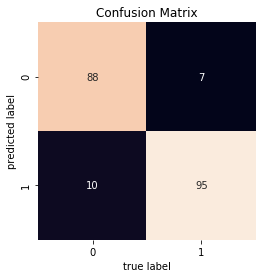

svm linear


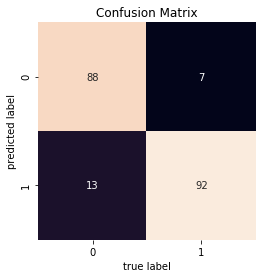

svm poly


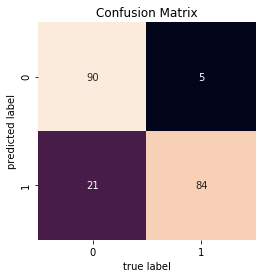

knc


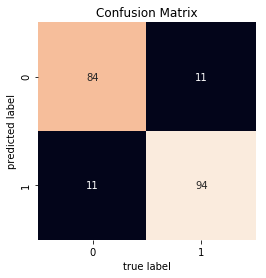

regression


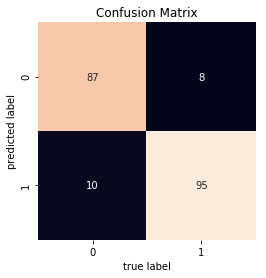

DT


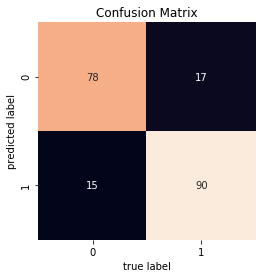

RF


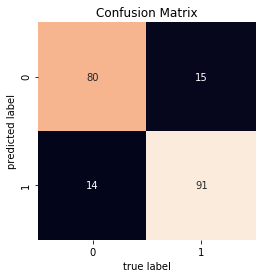

neural net


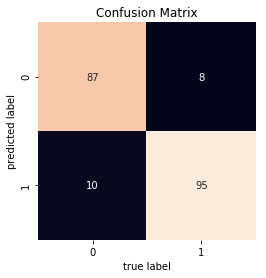

gradient boost


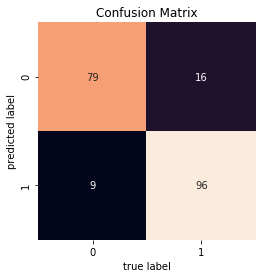

In [208]:
print('bayes')
lucem_illud.plotConfusionMatrix(clf_bayes, dfTest_1)
print('svm linear')
lucem_illud.plotConfusionMatrix(clf_svm_l, dfTest_1)
print('svm poly')
lucem_illud.plotConfusionMatrix(clf_svm_p, dfTest_1)
print('knc')
lucem_illud.plotConfusionMatrix(clf_knc, dfTest_1)
print('regression')
lucem_illud.plotConfusionMatrix(clf_reg, dfTest_1)
print('DT')
lucem_illud.plotConfusionMatrix(clf_DT, dfTest_1)
print('RF')
lucem_illud.plotConfusionMatrix(clf_RF, dfTest_1)
print('neural net')
lucem_illud.plotConfusionMatrix(clf_nn, dfTest_1)
print('gradient boost')
lucem_illud.plotConfusionMatrix(clf_GB, dfTest_1)

bayes


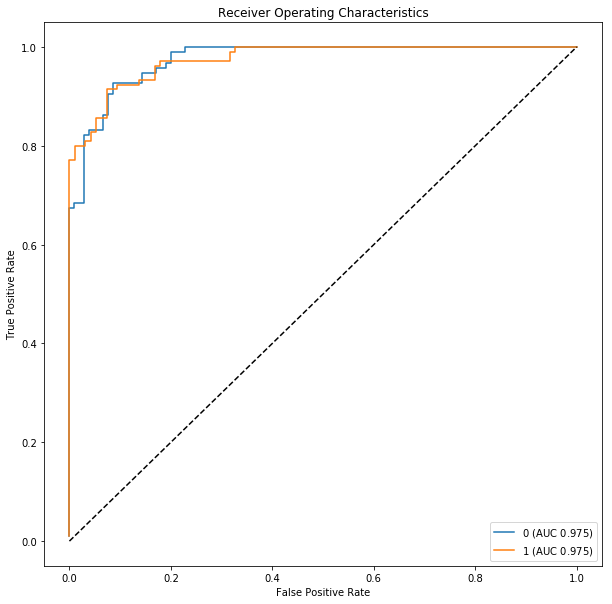

svm linear
The <class 'sklearn.svm.classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.
svm poly


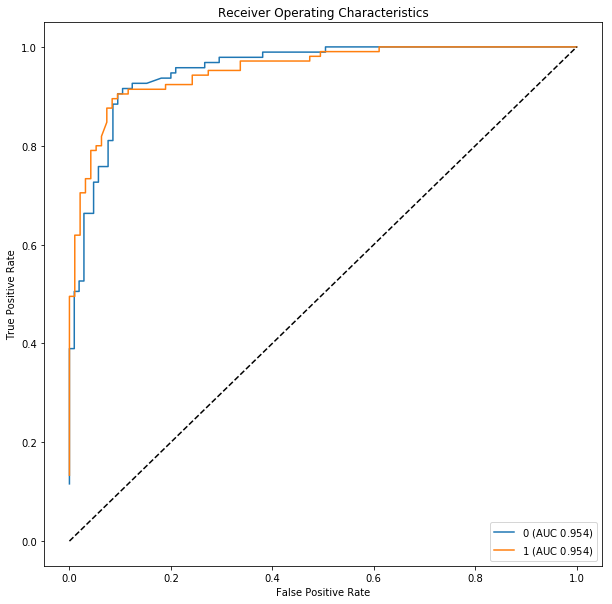

knc


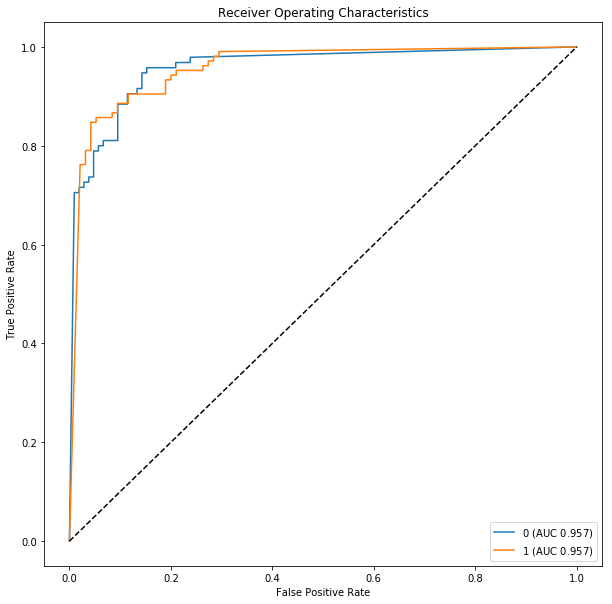

regression


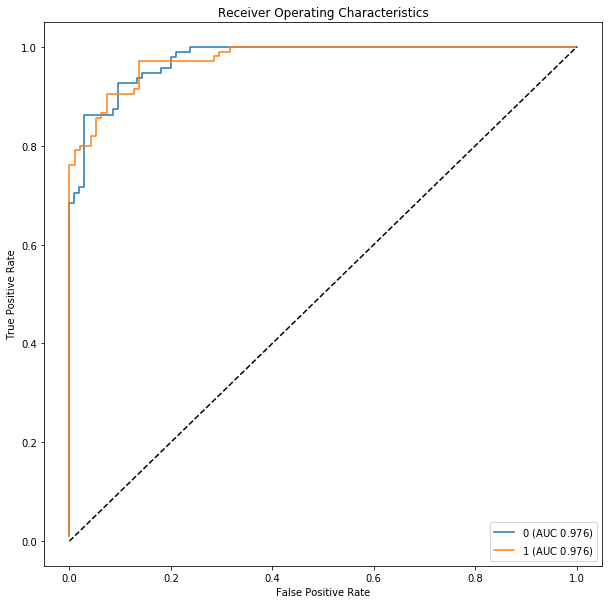

DT


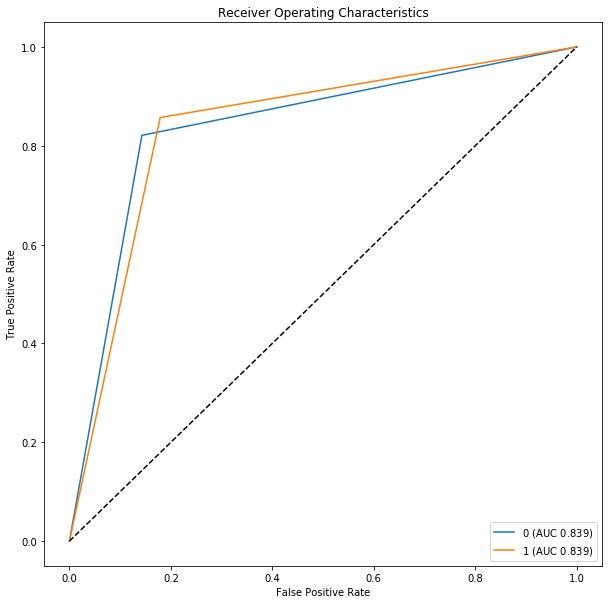

RF


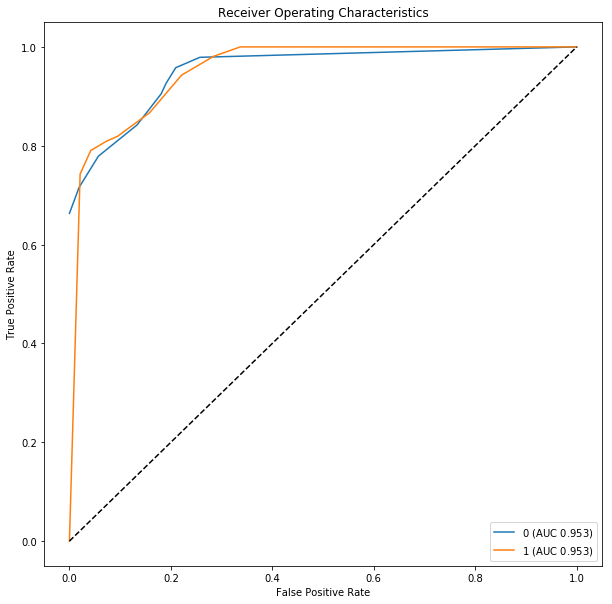

neural net


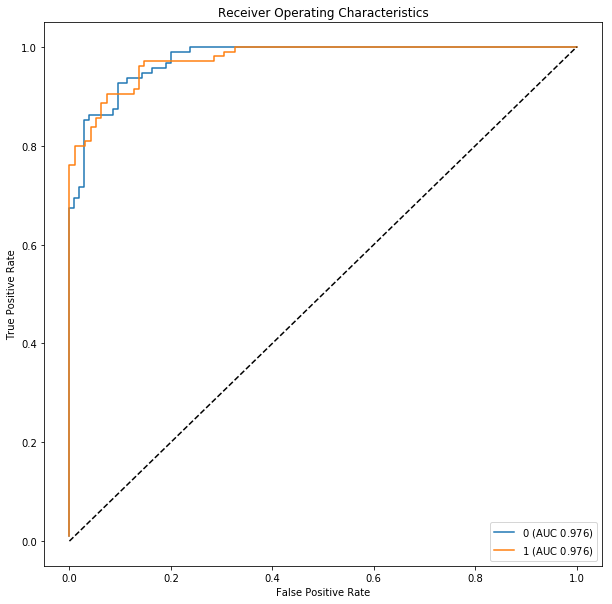

gradient boost


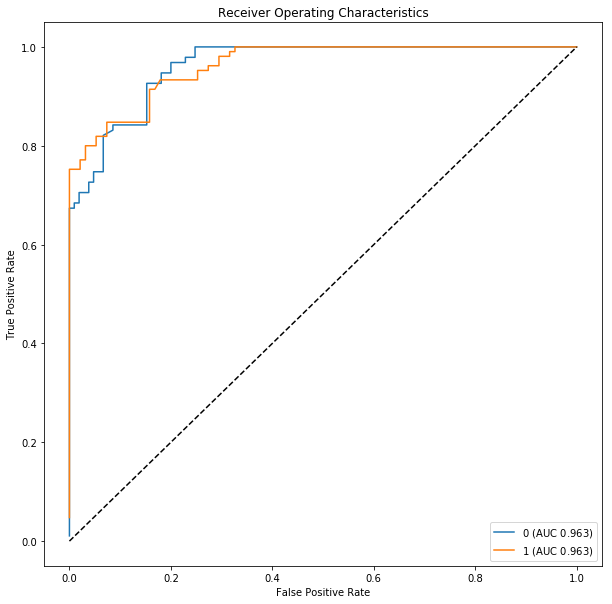

In [209]:
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest_1)
print('svm linear')
lucem_illud.plotMultiROC(clf_svm_l, dfTest_1)
print('svm poly')
lucem_illud.plotMultiROC(clf_svm_p, dfTest_1)
print('knc')
lucem_illud.plotMultiROC(clf_knc, dfTest_1)
print('regression')
lucem_illud.plotMultiROC(clf_reg, dfTest_1)
print('DT')
lucem_illud.plotMultiROC(clf_DT, dfTest_1)
print('RF')
lucem_illud.plotMultiROC(clf_RF, dfTest_1)
print('neural net')
lucem_illud.plotMultiROC(clf_nn, dfTest_1)
print('gradient boost')
lucem_illud.plotMultiROC(clf_GB, dfTest_1)

bayes


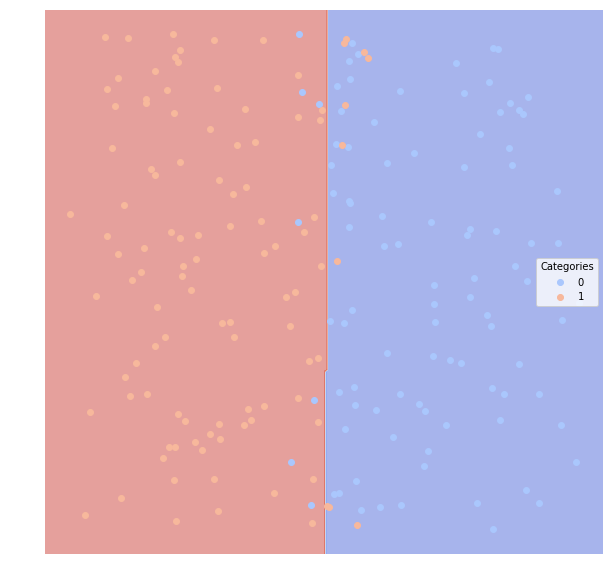

svm linear


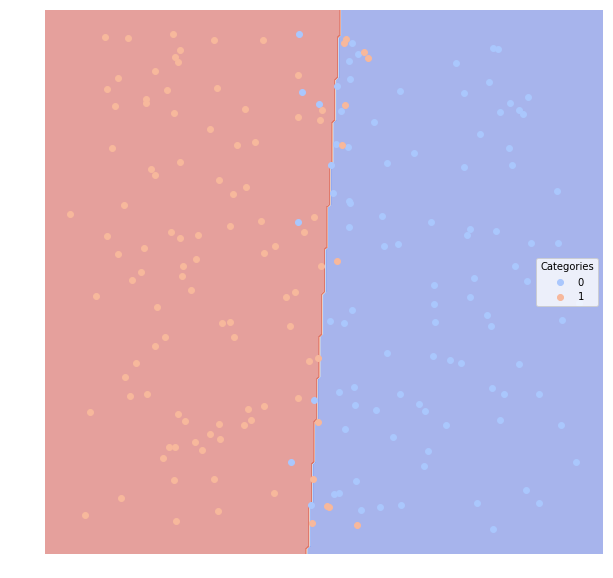

svm poly


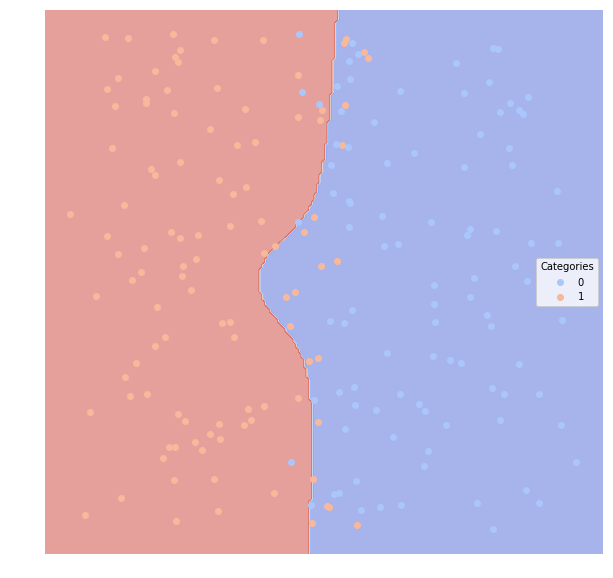

knc


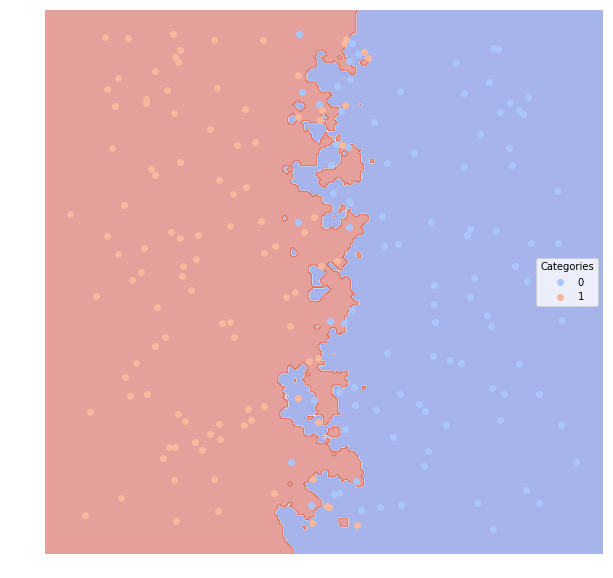

regression


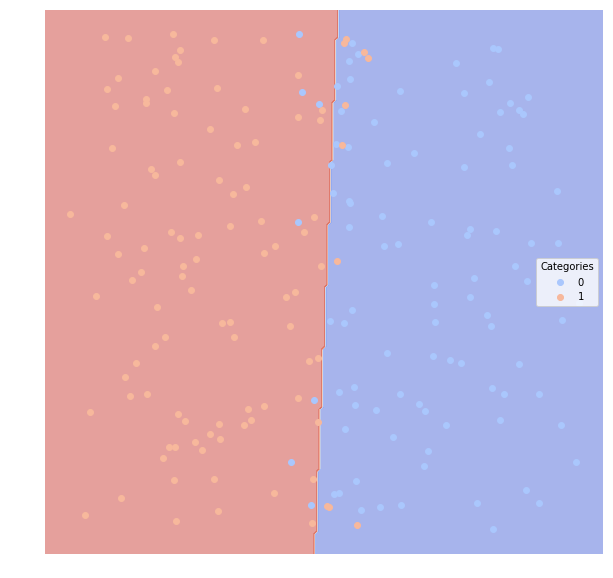

DT


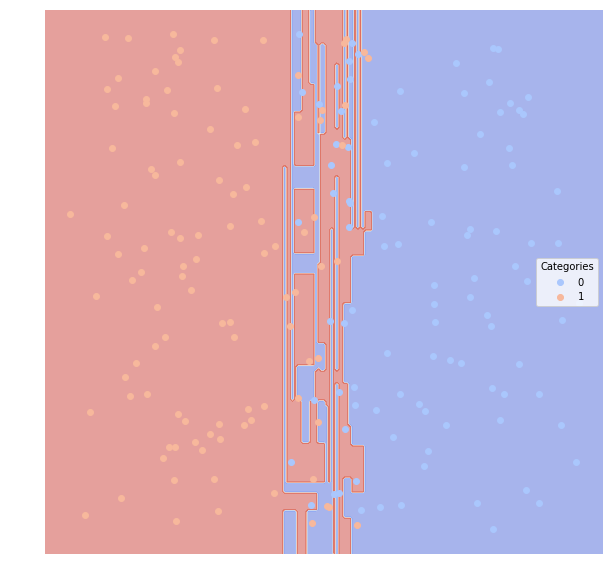

RF


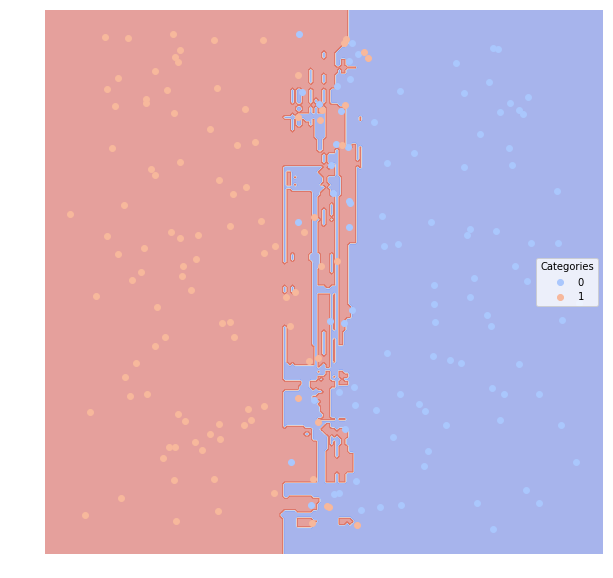

neural net


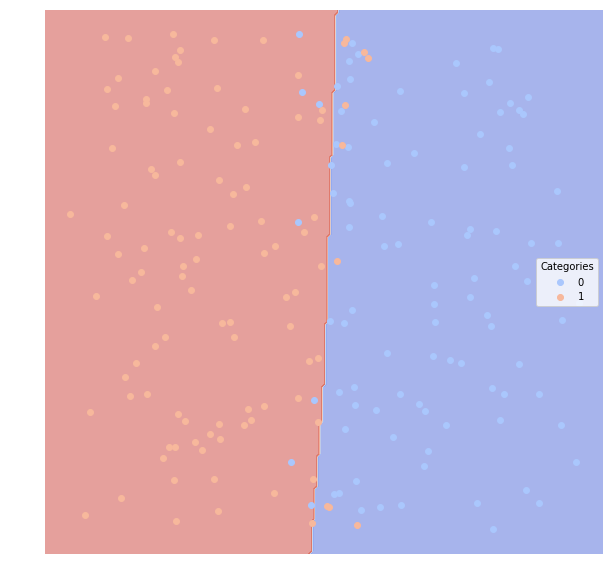

gradient boost


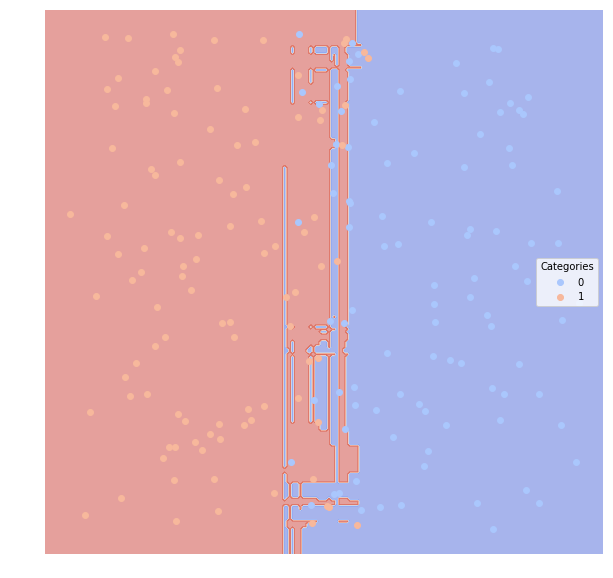

In [210]:
print('bayes')
lucem_illud.plotregions(clf_bayes, dfTest_1)
print('svm linear')
lucem_illud.plotregions(clf_svm_l, dfTest_1)
print('svm poly')
lucem_illud.plotregions(clf_svm_p, dfTest_1)
print('knc')
lucem_illud.plotregions(clf_knc, dfTest_1)
print('regression')
lucem_illud.plotregions(clf_reg, dfTest_1)
print('DT')
lucem_illud.plotregions(clf_DT, dfTest_1)
print('RF')
lucem_illud.plotregions(clf_RF, dfTest_1)
print('neural net')
lucem_illud.plotregions(clf_nn, dfTest_1)
print('gradient boost')
lucem_illud.plotregions(clf_GB, dfTest_1)

In [ ]:
#Best methods for Dataset 1: regression or neural net

In [ ]:
#Dataset 2: xorSplit, noise = .2

In [211]:
noise_1 = .2
dfTrain_2, dfTest_2 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise_1))

In [212]:
clf_bayes.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_svm_l.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_svm_p.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_knc.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_reg.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_DT.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_RF.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_nn.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])
clf_GB.fit(np.stack(dfTrain_2['vect'], axis=0), dfTrain_2['category'])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [214]:
display(lucem_illud.evaluateClassifier(clf_bayes, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_svm_l, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_svm_p, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_knc, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_reg, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_DT, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_RF, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_nn, dfTest_2))
display(lucem_illud.evaluateClassifier(clf_GB, dfTest_2))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.57,0.57,0.00,0.0
1,0.5,0.43,0.57,0.43,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.57,0.57,0.00,0.0
1,0.5,0.43,0.57,0.43,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.685843,0.715026,0.35,0.907407,0.429825
1,0.685843,0.547539,0.35,0.554795,0.941860


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.906671,0.897277,0.095,0.935780,0.894737
1,0.906671,0.832470,0.095,0.868132,0.918605


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.57,0.57,0.00,0.0
1,0.5,0.43,0.57,0.43,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.873113,0.863633,0.13,0.915094,0.850877
1,0.873113,0.778424,0.13,0.819149,0.895349


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.914015,0.900845,0.085,0.929204,0.921053
1,0.914015,0.853152,0.085,0.896552,0.906977


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.924215,0.912225,0.075,0.938053,0.929825
1,0.924215,0.869135,0.075,0.908046,0.918605


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.902285,0.893541,0.1,0.935185,0.885965
1,0.902285,0.823802,0.1,0.858696,0.918605


bayes


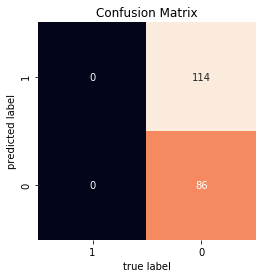

svm linear


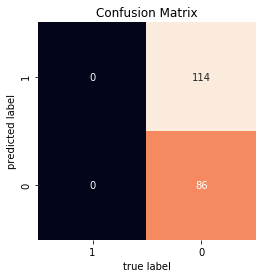

svm poly


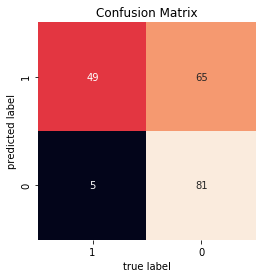

knc


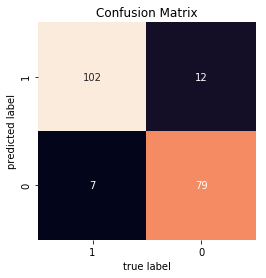

regression


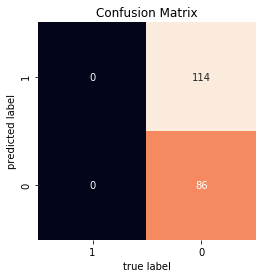

DT


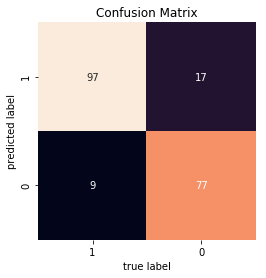

RF


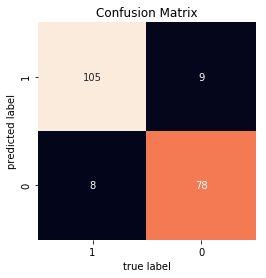

neural net


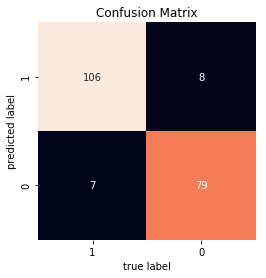

gradient boost


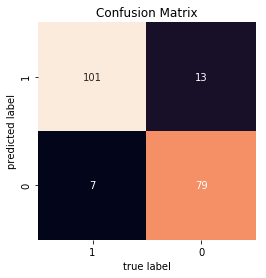

In [215]:
print('bayes')
lucem_illud.plotConfusionMatrix(clf_bayes, dfTest_2)
print('svm linear')
lucem_illud.plotConfusionMatrix(clf_svm_l, dfTest_2)
print('svm poly')
lucem_illud.plotConfusionMatrix(clf_svm_p, dfTest_2)
print('knc')
lucem_illud.plotConfusionMatrix(clf_knc, dfTest_2)
print('regression')
lucem_illud.plotConfusionMatrix(clf_reg, dfTest_2)
print('DT')
lucem_illud.plotConfusionMatrix(clf_DT, dfTest_2)
print('RF')
lucem_illud.plotConfusionMatrix(clf_RF, dfTest_2)
print('neural net')
lucem_illud.plotConfusionMatrix(clf_nn, dfTest_2)
print('gradient boost')
lucem_illud.plotConfusionMatrix(clf_GB, dfTest_2)

bayes


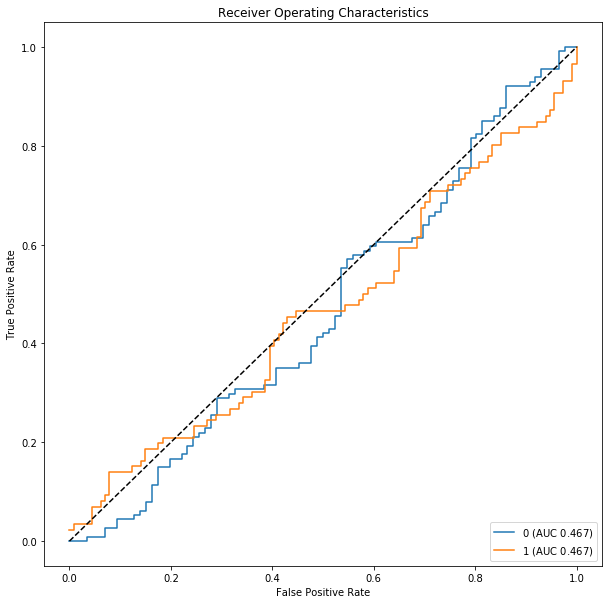

svm linear
The <class 'sklearn.svm.classes.SVC'> classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.
svm poly


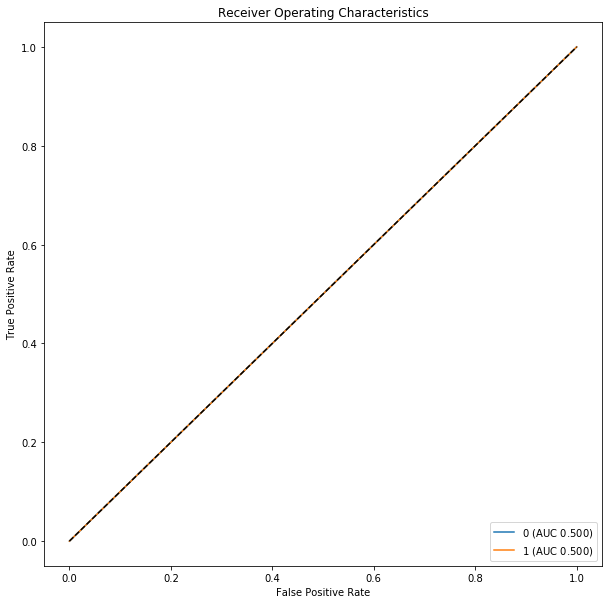

knc


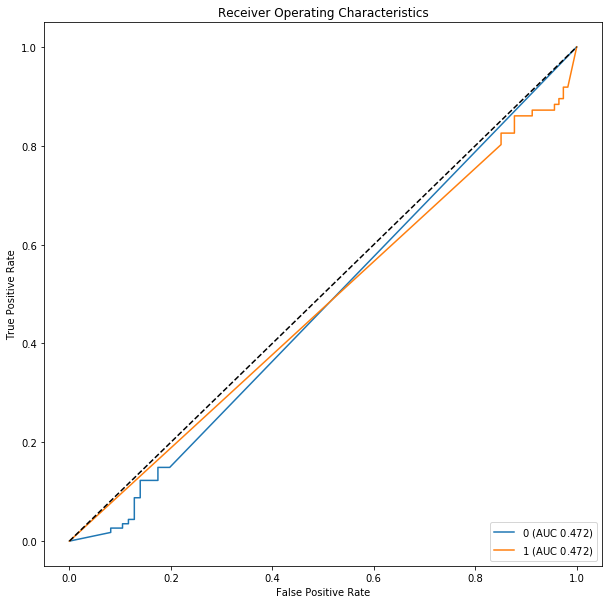

regression


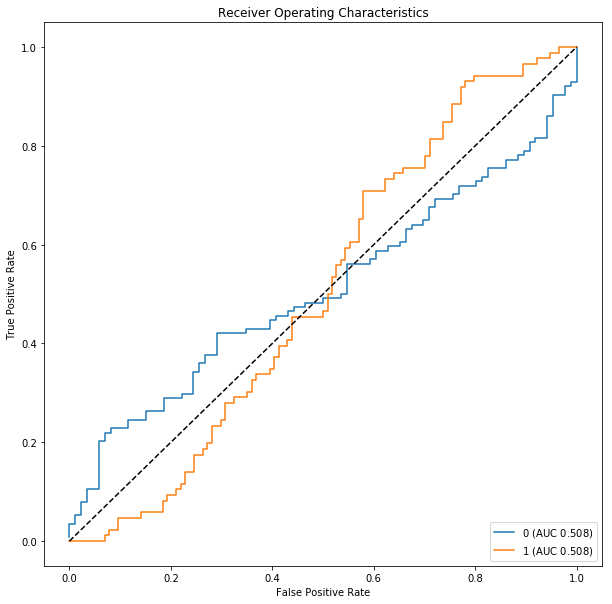

DT


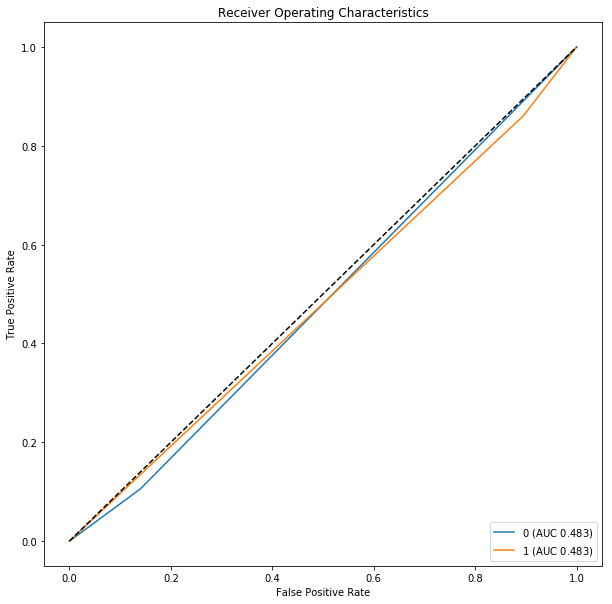

RF


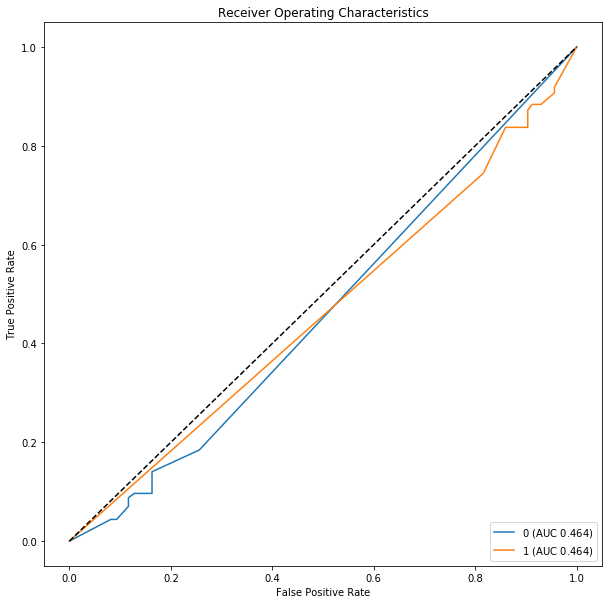

neural net


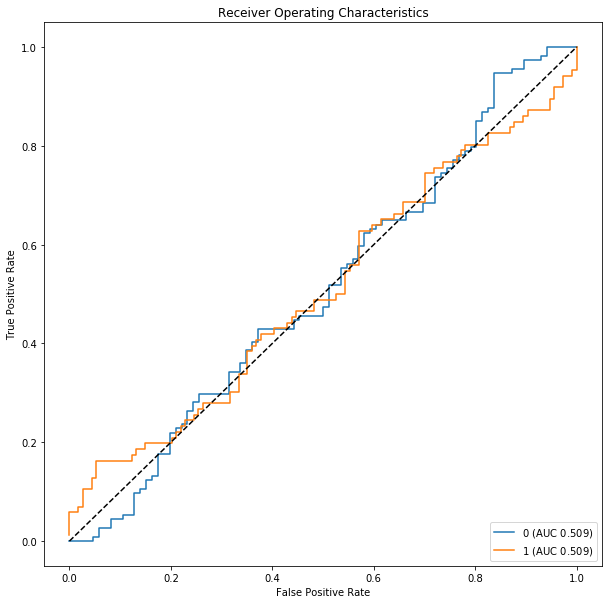

gradient boost


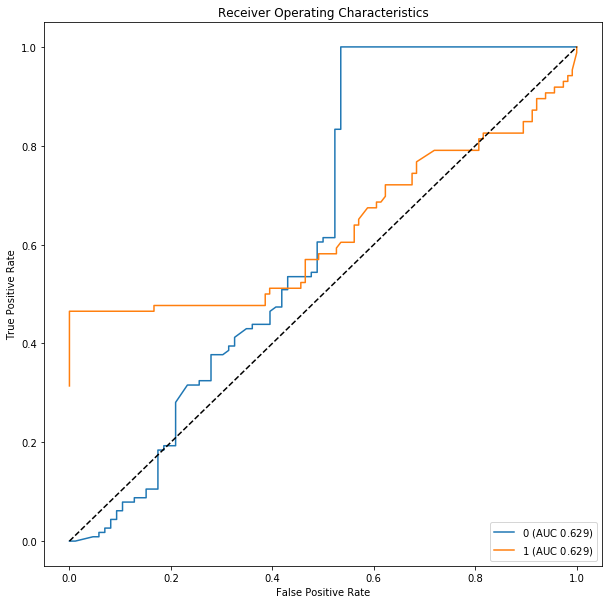

In [230]:
print('bayes')
lucem_illud.plotMultiROC(clf_bayes, dfTest_2)
print('svm linear')
lucem_illud.plotMultiROC(clf_svm_l, dfTest_2)
print('svm poly')
lucem_illud.plotMultiROC(clf_svm_p, dfTest_2)
print('knc')
lucem_illud.plotMultiROC(clf_knc, dfTest_2)
print('regression')
lucem_illud.plotMultiROC(clf_reg, dfTest_2)
print('DT')
lucem_illud.plotMultiROC(clf_DT, dfTest_2)
print('RF')
lucem_illud.plotMultiROC(clf_RF, dfTest_2)
print('neural net')
lucem_illud.plotMultiROC(clf_nn, dfTest_2)
print('gradient boost')
lucem_illud.plotMultiROC(clf_GB, dfTest_2)

bayes


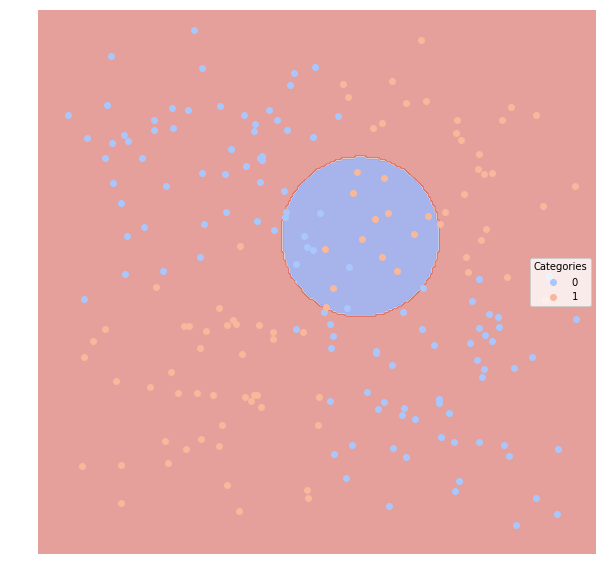

svm linear


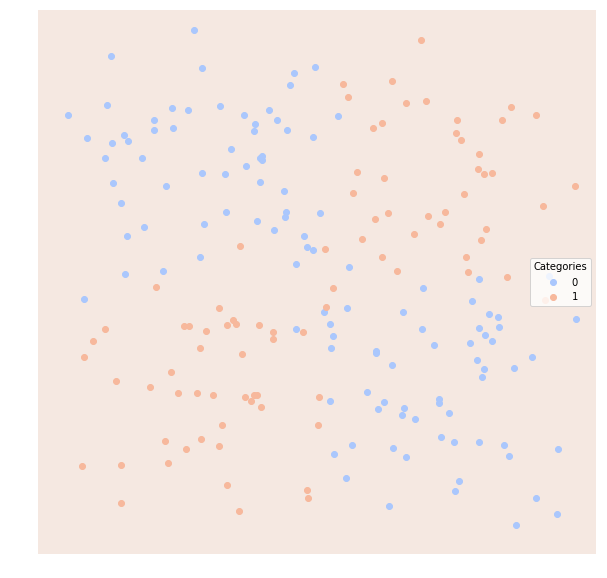

svm poly


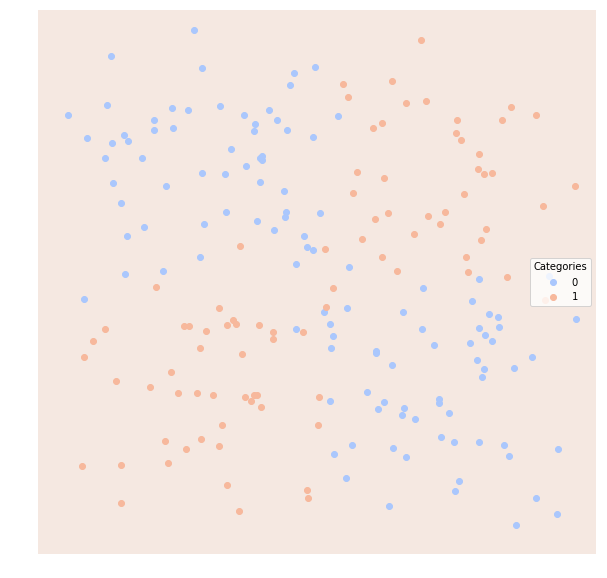

knc


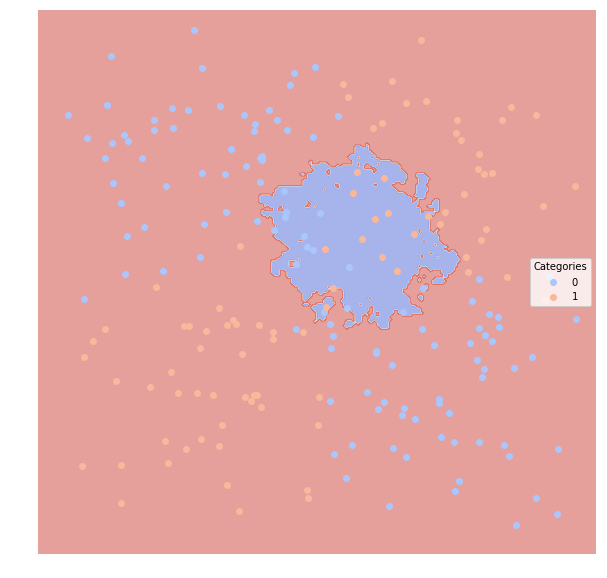

regression


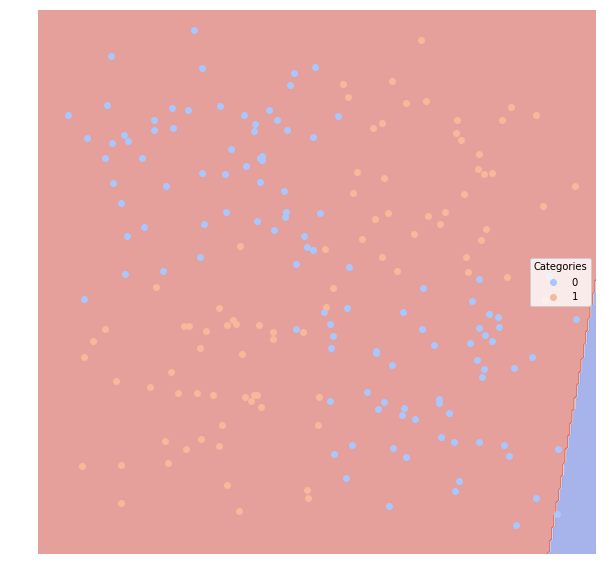

DT


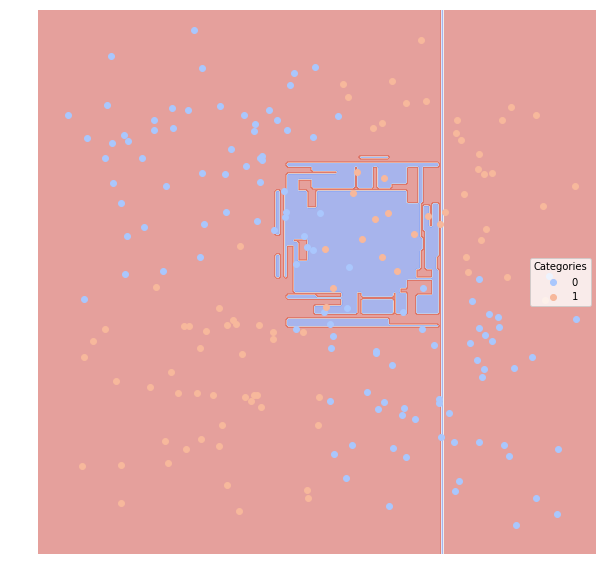

RF


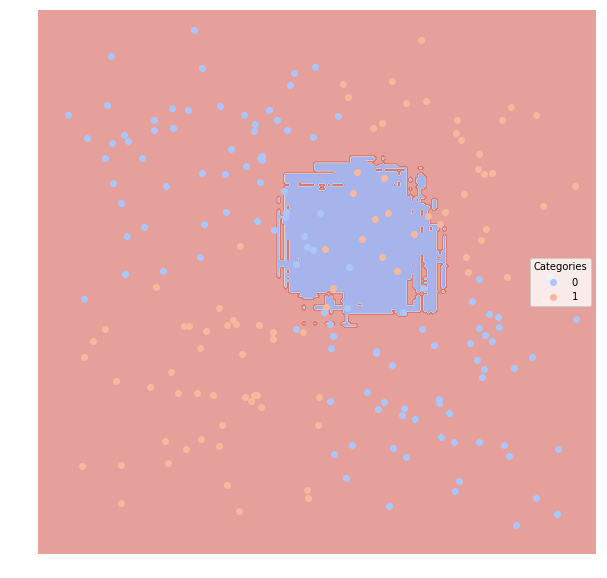

neural net


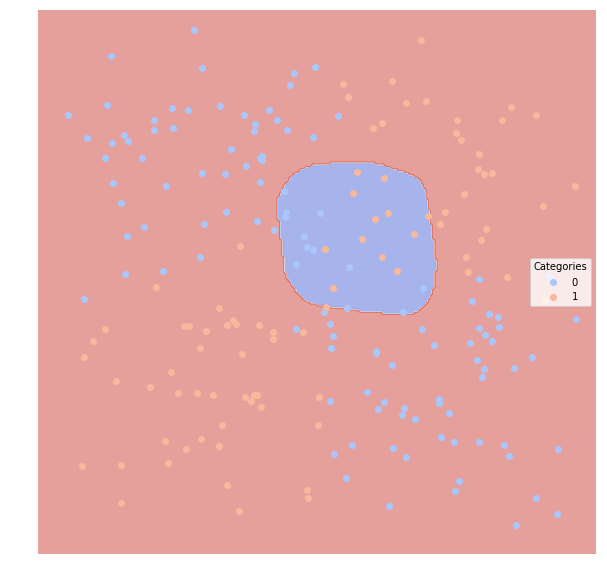

gradient boost


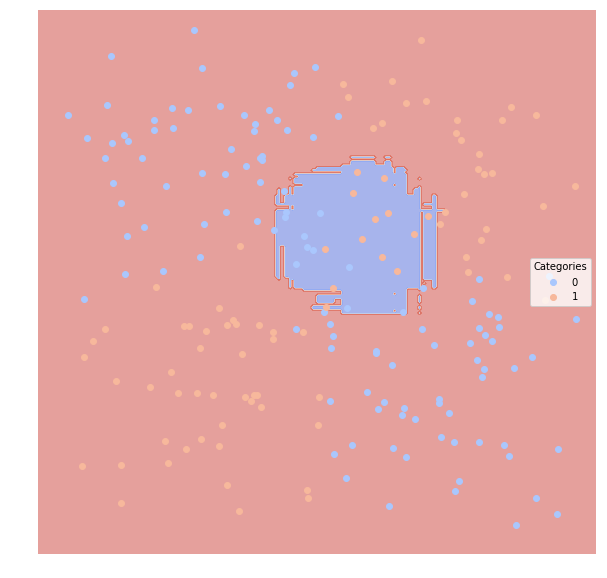

In [231]:
print('bayes')
lucem_illud.plotregions(clf_bayes, dfTest_2)
print('svm linear')
lucem_illud.plotregions(clf_svm_l, dfTest_2)
print('svm poly')
lucem_illud.plotregions(clf_svm_p, dfTest_2)
print('knc')
lucem_illud.plotregions(clf_knc, dfTest_2)
print('regression')
lucem_illud.plotregions(clf_reg, dfTest_2)
print('DT')
lucem_illud.plotregions(clf_DT, dfTest_2)
print('RF')
lucem_illud.plotregions(clf_RF, dfTest_2)
print('neural net')
lucem_illud.plotregions(clf_nn, dfTest_2)
print('gradient boost')
lucem_illud.plotregions(clf_GB, dfTest_2)

In [232]:
#Best methods for Dataset 2: Neural net

In [ ]:
#Dataset 3: targetSplit, noise = .2

In [224]:
noise = .2
dfTrain_3, dfTest_3 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))

In [225]:
clf_bayes.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_svm_l.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_svm_p.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_knc.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_reg.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_DT.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_RF.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_nn.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])
clf_GB.fit(np.stack(dfTrain_3['vect'], axis=0), dfTrain_3['category'])

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [226]:
display(lucem_illud.evaluateClassifier(clf_bayes, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_svm_l, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_svm_p, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_knc, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_reg, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_DT, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_RF, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_nn, dfTest_3))
display(lucem_illud.evaluateClassifier(clf_GB, dfTest_3))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.890404,0.859320,0.105,0.880342,0.936364
1,0.890404,0.843226,0.105,0.915663,0.844444


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.55,0.55,0.00,0.0
1,0.5,0.45,0.55,0.45,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.55,0.55,0.00,0.0
1,0.5,0.45,0.55,0.45,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.892424,0.865676,0.105,0.893805,0.918182
1,0.892424,0.837011,0.105,0.896552,0.866667


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.5,0.55,0.55,0.00,0.0
1,0.5,0.45,0.55,0.45,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.896465,0.879632,0.105,0.923810,0.881818
1,0.896465,0.826433,0.105,0.863158,0.911111


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.893434,0.869001,0.105,0.900901,0.909091
1,0.893434,0.834151,0.105,0.887640,0.877778


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.872222,0.843496,0.125,0.876106,0.900000
1,0.872222,0.807676,0.125,0.873563,0.844444


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.890909,0.871947,0.11,0.915094,0.881818
1,0.890909,0.820532,0.11,0.861702,0.900000


bayes


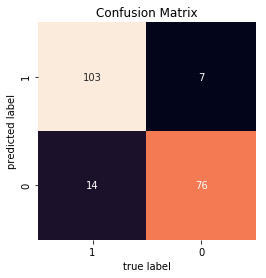

svm linear


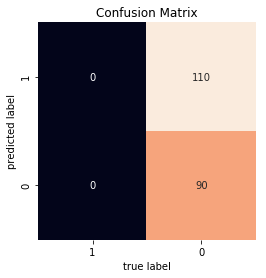

svm poly


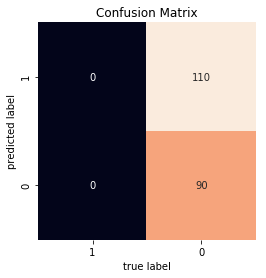

knc


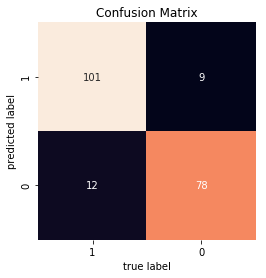

regression


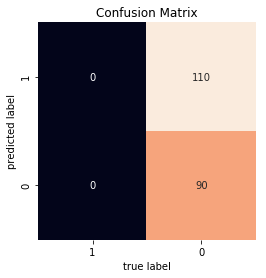

DT


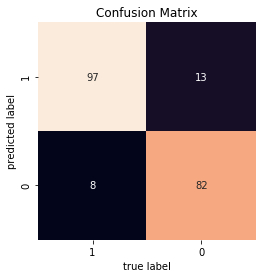

RF


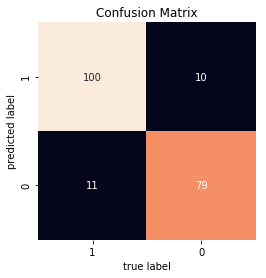

neural net


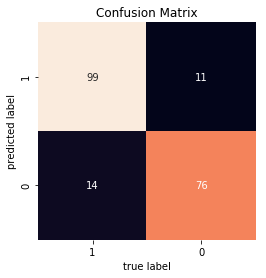

gradient boost


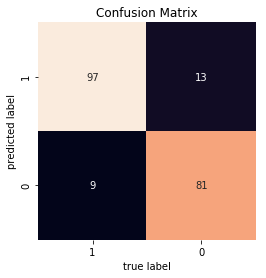

In [227]:
print('bayes')
lucem_illud.plotConfusionMatrix(clf_bayes, dfTest_3)
print('svm linear')
lucem_illud.plotConfusionMatrix(clf_svm_l, dfTest_3)
print('svm poly')
lucem_illud.plotConfusionMatrix(clf_svm_p, dfTest_3)
print('knc')
lucem_illud.plotConfusionMatrix(clf_knc, dfTest_3)
print('regression')
lucem_illud.plotConfusionMatrix(clf_reg, dfTest_3)
print('DT')
lucem_illud.plotConfusionMatrix(clf_DT, dfTest_3)
print('RF')
lucem_illud.plotConfusionMatrix(clf_RF, dfTest_3)
print('neural net')
lucem_illud.plotConfusionMatrix(clf_nn, dfTest_3)
print('gradient boost')
lucem_illud.plotConfusionMatrix(clf_GB, dfTest_3)

In [ ]:
#Best methods for Dataset 3: bayes or knc

In [322]:
noise2 = .4

dfTrain4, dfTest4 = lucem_illud.trainTestSplit(lucem_illud.random())
dfTrain5, dfTest5 = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise2))
dfTrain6, dfTest6 = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise2)) #Please try this one
dfTrain7, dfTest7 = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise2))
dfTrain8, dfTest8 = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise2))

In [323]:
#Dataset 4: random, noise .4
clf_bayes.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_svm_l.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_svm_p.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_knc.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_reg.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_DT.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_RF.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_nn.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
clf_GB.fit(np.stack(dfTrain4['vect'], axis=0), dfTrain4['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, dfTest4))
display(lucem_illud.evaluateClassifier(clf_svm_l, dfTest4))
display(lucem_illud.evaluateClassifier(clf_svm_p, dfTest4))
display(lucem_illud.evaluateClassifier(clf_knc, dfTest4))
display(lucem_illud.evaluateClassifier(clf_reg, dfTest4))
display(lucem_illud.evaluateClassifier(clf_DT, dfTest4))
display(lucem_illud.evaluateClassifier(clf_RF, dfTest4))
display(lucem_illud.evaluateClassifier(clf_nn, dfTest4))
display(lucem_illud.evaluateClassifier(clf_GB, dfTest4))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.561625,0.524138,0.44,0.543103,0.642857
1,0.561625,0.545229,0.44,0.583333,0.480392


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.570228,0.53003,0.43,0.558824,0.581633
1,0.570228,0.55003,0.43,0.581633,0.558824


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.564926,0.526791,0.435,0.555556,0.561224
1,0.564926,0.546539,0.435,0.574257,0.568627


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.535914,0.509157,0.465,0.522936,0.581633
1,0.535914,0.529339,0.465,0.549451,0.490196


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.580432,0.536542,0.42,0.567308,0.602041
1,0.580432,0.556801,0.42,0.593750,0.558824


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.511004,0.495612,0.49,0.500000,0.561224
1,0.511004,0.515632,0.49,0.522222,0.460784


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.536915,0.509618,0.465,0.521008,0.632653
1,0.536915,0.530098,0.465,0.555556,0.441176


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.618147,0.559914,0.385,0.580153,0.775510
1,0.618147,0.588868,0.385,0.681159,0.460784


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.546519,0.515169,0.455,0.530435,0.622449
1,0.546519,0.535744,0.455,0.564706,0.470588


In [324]:
#Best method for Dataset4: neural net, although it's not great

In [325]:
#Dataset 5: andSplit, noise .4
clf_bayes.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_svm_l.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_svm_p.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_knc.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_reg.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_DT.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_RF.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_nn.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
clf_GB.fit(np.stack(dfTrain5['vect'], axis=0), dfTrain5['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, dfTest5))
display(lucem_illud.evaluateClassifier(clf_svm_l, dfTest5))
display(lucem_illud.evaluateClassifier(clf_svm_p, dfTest5))
display(lucem_illud.evaluateClassifier(clf_knc, dfTest5))
display(lucem_illud.evaluateClassifier(clf_reg, dfTest5))
display(lucem_illud.evaluateClassifier(clf_DT, dfTest5))
display(lucem_illud.evaluateClassifier(clf_RF, dfTest5))
display(lucem_illud.evaluateClassifier(clf_nn, dfTest5))
display(lucem_illud.evaluateClassifier(clf_GB, dfTest5))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.744762,0.718378,0.245,0.750000,0.837838
1,0.744762,0.652339,0.245,0.763158,0.651685


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.755998,0.728680,0.235,0.762295,0.837838
1,0.755998,0.663583,0.235,0.769231,0.674157


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.763893,0.733945,0.225,0.761905,0.864865
1,0.763893,0.678545,0.225,0.797297,0.662921


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.760451,0.735968,0.235,0.780702,0.801802
1,0.760451,0.660145,0.235,0.744186,0.719101


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.751493,0.725184,0.24,0.760331,0.828829
1,0.751493,0.657018,0.24,0.759494,0.674157


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.754783,0.734694,0.245,0.792453,0.756757
1,0.754783,0.646577,0.245,0.712766,0.752809


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.773965,0.746729,0.22,0.786325,0.828829
1,0.773965,0.679488,0.22,0.771084,0.719101


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.761616,0.733958,0.23,0.768595,0.837838
1,0.761616,0.669228,0.23,0.772152,0.685393


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.736866,0.713108,0.255,0.7500,0.810811
1,0.736866,0.638904,0.255,0.7375,0.662921


In [ ]:
#Best method for Dataset 5: random forest

In [ ]:
#Visualization of Datasets from Ex. 1 (Above)
lucem_illud.plotter(dfTrain_1)
lucem_illud.plotter(dfTrain_2)
lucem_illud.plotter(dfTrain_3)

Templates for Datasets Above (Part 1 of Ex. 1)

In [181]:
# Template for all datasets

#noise = number between 0-1

#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.random())
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.andSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.targetSplit(noise))
#dfTrain, dfTest = lucem_illud.trainTestSplit(lucem_illud.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

In [229]:
#lucem_illud.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [ ]:
#Bayes
#clf_bayes = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf_svm_l = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up
#clf_svm_p = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf_knc = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf_reg = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf_DT = sklearn.tree.DecisionTreeClassifier()
#clf_RF = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf_nn = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf_GB = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [216]:
#Template for all models
#clf_bayes.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_svm_l.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_svm_p.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_knc.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_reg.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_DT.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_RF.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_nn.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
#clf_GB.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [217]:
# Template for all models
#display(lucem_illud.evaluateClassifier(clf_bayes, dfTest))
#display(lucem_illud.evaluateClassifier(clf_svm_l, dfTest))
#display(lucem_illud.evaluateClassifier(clf_svm_p, dfTest))
#display(lucem_illud.evaluateClassifier(clf_knc, dfTest))
#display(lucem_illud.evaluateClassifier(clf_reg, dfTest))
#display(lucem_illud.evaluateClassifier(clf_DT, dfTest))
#display(lucem_illud.evaluateClassifier(clf_RF, dfTest))
#display(lucem_illud.evaluateClassifier(clf_nn, dfTest))
#display(lucem_illud.evaluateClassifier(clf_GB, dfTest))

This lets us look at which classes do better:

In [218]:
# Template for all models
#print('bayes')
#lucem_illud.plotConfusionMatrix(clf_bayes, dfTest)
#print('svm linear')
#lucem_illud.plotConfusionMatrix(clf_svm_l, dfTest)
#print('svm poly')
#lucem_illud.plotConfusionMatrix(clf_svm_p, dfTest)
#print('knc')
#lucem_illud.plotConfusionMatrix(clf_knc, dfTest)
#print('regression')
#lucem_illud.plotConfusionMatrix(clf_reg, dfTest)
#print('DT')
#lucem_illud.plotConfusionMatrix(clf_DT, dfTest)
#print('RF')
#lucem_illud.plotConfusionMatrix(clf_RF, dfTest)
#print('neural net')
#lucem_illud.plotConfusionMatrix(clf_nn, dfTest)
#print('gradient boost')
#lucem_illud.plotConfusionMatrix(clf_GB, dfTest)

The greater the area under the curve the better.

In [219]:
# Template for all models
#print('bayes')
#lucem_illud.plotMultiROC(clf_bayes, dfTest)
#print('svm linear')
#lucem_illud.plotMultiROC(clf_svm_l, dfTest)
#print('svm poly')
#lucem_illud.plotMultiROC(clf_svm_p, dfTest)
#print('knc')
#lucem_illud.plotMultiROC(clf_knc, dfTest)
#print('regression')
#lucem_illud.plotMultiROC(clf_reg, dfTest)
#print('DT')
#lucem_illud.plotMultiROC(clf_DT, dfTest)
#print('RF')
#lucem_illud.plotMultiROC(clf_RF, dfTest)
#print('neural net')
#lucem_illud.plotMultiROC(clf_nn, dfTest)
#print('gradient boost')
#lucem_illud.plotMultiROC(clf_GB, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

In [220]:
# Template for all models
#print('bayes')
#lucem_illud.plotregions(clf_bayes, dfTest)
#print('svm linear')
#lucem_illud.plotregions(clf_svm_l, dfTest)
#print('svm poly')
#lucem_illud.plotregions(clf_svm_p, dfTest)
#print('knc')
#lucem_illud.plotregions(clf_knc, dfTest)
#print('regression')
#lucem_illud.plotregions(clf_reg, dfTest)
#print('DT')
#lucem_illud.plotregions(clf_DT, dfTest)
#print('RF')
#lucem_illud.plotregions(clf_RF, dfTest)
#print('neural net')
#lucem_illud.plotregions(clf_nn, dfTest)
#print('gradient boost')
#lucem_illud.plotregions(clf_GB, dfTest)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [327]:
redditdfTrain, redditdfTest = lucem_illud.trainTestSplit(lucem_illud.loadReddit())
ngdfTrain, ngdfTest = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
sensdfTrain, sensdfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
senldfTrain, senldfTest = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())
spamdfTrain, spamdfTest = lucem_illud.trainTestSplit(lucem_illud.loadSpam())

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors


In [328]:
#Reddit
clf_bayes.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_svm_l.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_svm_p.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_knc.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_reg.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_DT.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_RF.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_nn.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
clf_GB.fit(np.stack(redditdfTrain['vect'], axis=0), redditdfTrain['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_l, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_p, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_knc, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_reg, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_DT, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_RF, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_nn, redditdfTest))
display(lucem_illud.evaluateClassifier(clf_GB, redditdfTest))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.893797,0.773805,0.059561,0.903226,0.811594
Bad Roommates,0.803031,0.668179,0.128527,0.880597,0.641304
Weeaboo Tales,0.876060,0.630564,0.163009,0.642336,0.967033
Relationships,0.763267,0.516104,0.131661,0.735849,0.582090


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.990754,0.974359,0.006270,0.985507,0.985507
Bad Roommates,0.972826,0.961326,0.015674,1.000000,0.945652
Weeaboo Tales,0.997807,0.989130,0.003135,0.989130,1.000000
Relationships,0.982617,0.918838,0.018809,0.929577,0.985075


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.5,0.216301,0.216301,0.000000,0.0
Bad Roommates,0.5,0.288401,0.288401,0.000000,0.0
Weeaboo Tales,0.5,0.285266,0.285266,0.000000,0.0
Relationships,0.5,0.210031,0.789969,0.210031,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.967014,0.926448,0.018809,0.970149,0.942029
Bad Roommates,0.958437,0.880311,0.040752,0.907216,0.956522
Weeaboo Tales,0.930789,0.871741,0.047022,0.952381,0.879121
Relationships,0.907042,0.735382,0.068966,0.816901,0.865672


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.998000,0.985714,0.003135,0.985714,1.000000
Bad Roommates,0.981493,0.966047,0.012539,0.988889,0.967391
Weeaboo Tales,0.992313,0.981278,0.006270,0.989011,0.989011
Relationships,0.979122,0.933618,0.015674,0.955882,0.970149


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.891536,0.686533,0.087774,0.766234,0.855072
Bad Roommates,0.884696,0.814000,0.072100,0.960000,0.782609
Weeaboo Tales,0.914329,0.816963,0.065831,0.897727,0.868132
Relationships,0.834488,0.557885,0.131661,0.658228,0.776119


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.913536,0.795731,0.053292,0.893939,0.855072
Bad Roommates,0.908495,0.821892,0.065831,0.917647,0.847826
Weeaboo Tales,0.959345,0.934161,0.025078,0.988235,0.923077
Relationships,0.930467,0.726260,0.075235,0.759036,0.940299


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,1.000000,1.000000,0.000000,1.000000,1.000000
Bad Roommates,0.970623,0.950580,0.018809,0.988636,0.945652
Weeaboo Tales,0.995614,0.978495,0.006270,0.978495,1.000000
Relationships,0.967691,0.895409,0.025078,0.927536,0.955224


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.982754,0.921142,0.018809,0.931507,0.985507
Bad Roommates,0.954319,0.927380,0.028213,0.988235,0.913043
Weeaboo Tales,0.968166,0.905182,0.031348,0.926316,0.967033
Relationships,0.935856,0.836055,0.040752,0.909091,0.895522


In [329]:
#Newsgroup
clf_bayes.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_svm_l.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_svm_p.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_knc.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_reg.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_DT.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_RF.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_nn.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
clf_GB.fit(np.stack(ngdfTrain['vect'], axis=0), ngdfTrain['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_l, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_p, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_knc, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_reg, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_DT, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_RF, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_nn, ngdfTest))
display(lucem_illud.evaluateClassifier(clf_GB, ngdfTest))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.826231,0.500439,0.155319,0.578125,0.795699
comp.windows.x,0.897699,0.791139,0.078723,0.885496,0.840580
misc.forsale,0.810024,0.617963,0.129787,0.783019,0.685950
rec.autos,0.848734,0.688850,0.100000,0.838095,0.745763


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.860500,0.669846,0.080851,0.816092,0.763441
comp.windows.x,0.921228,0.847196,0.057447,0.930233,0.869565
misc.forsale,0.933055,0.823404,0.055319,0.880000,0.909091
rec.autos,0.927798,0.787536,0.065957,0.837209,0.915254


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.5,0.197872,0.802128,0.197872,1.0
comp.windows.x,0.5,0.293617,0.293617,0.000000,0.0
misc.forsale,0.5,0.257447,0.257447,0.000000,0.0
rec.autos,0.5,0.251064,0.251064,0.000000,0.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.563062,0.221219,0.525532,0.230769,0.709677
comp.windows.x,0.539855,0.349923,0.270213,1.000000,0.079710
misc.forsale,0.552286,0.329551,0.231915,0.928571,0.107438
rec.autos,0.528746,0.263250,0.397872,0.283019,0.381356


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.879211,0.732928,0.063830,0.879518,0.784946
comp.windows.x,0.947486,0.897073,0.038298,0.954545,0.913043
misc.forsale,0.928923,0.817387,0.057447,0.879032,0.900826
rec.autos,0.930614,0.787748,0.065957,0.832061,0.923729


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.742435,0.450675,0.146809,0.650000,0.559140
comp.windows.x,0.846080,0.709814,0.112766,0.851240,0.746377
misc.forsale,0.817128,0.576043,0.155319,0.676471,0.760331
rec.autos,0.791988,0.530580,0.172340,0.639098,0.720339


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.809603,0.551069,0.117021,0.711111,0.688172
comp.windows.x,0.893181,0.774475,0.085106,0.865672,0.840580
misc.forsale,0.885837,0.727966,0.089362,0.821138,0.834711
rec.autos,0.857112,0.659855,0.112766,0.764228,0.796610


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.891361,0.734008,0.063830,0.853933,0.817204
comp.windows.x,0.944757,0.907112,0.036170,0.976378,0.898551
misc.forsale,0.933055,0.823404,0.055319,0.880000,0.909091
rec.autos,0.927798,0.787536,0.065957,0.837209,0.915254


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
comp.sys.mac.hardware,0.825732,0.574339,0.110638,0.720430,0.720430
comp.windows.x,0.913698,0.817013,0.068085,0.895522,0.869565
misc.forsale,0.890301,0.757135,0.078723,0.862069,0.826446
rec.autos,0.851430,0.640681,0.121277,0.740157,0.796610


In [330]:
#Senate Small
clf_bayes.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_svm_l.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_svm_p.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_knc.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_reg.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_DT.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_RF.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_nn.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
clf_GB.fit(np.stack(sensdfTrain['vect'], axis=0), sensdfTrain['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_l, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_p, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_knc, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_reg, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_DT, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_RF, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_nn, sensdfTest))
display(lucem_illud.evaluateClassifier(clf_GB, sensdfTest))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.840774,0.852458,0.158358,0.895000,0.844340
Obama,0.840774,0.702850,0.158358,0.765957,0.837209


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.98989,0.98887,0.008798,0.990610,0.995283
Obama,0.98989,0.98267,0.008798,0.992188,0.984496


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.5,0.621701,0.378299,0.621701,1.0
Obama,0.5,0.378299,0.378299,0.000000,0.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.839422,0.847935,0.152493,0.880952,0.872642
Obama,0.839422,0.713352,0.152493,0.793893,0.806202


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.976744,0.972477,0.017595,0.972477,1.000000
Obama,0.976744,0.971084,0.017595,1.000000,0.953488


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.995283,0.996431,0.005865,1.000000,0.990566
Obama,0.995283,0.984733,0.005865,0.984733,1.000000


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.98989,0.98887,0.008798,0.990610,0.995283
Obama,0.98989,0.98267,0.008798,0.992188,0.984496


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.94389,0.943290,0.052786,0.957547,0.957547
Obama,0.94389,0.891726,0.052786,0.930233,0.930233


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Clinton,0.997642,0.998216,0.002933,1.000000,0.995283
Obama,0.997642,0.992308,0.002933,0.992308,1.000000


In [332]:
#Senate Large
clf_bayes.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_svm_l.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_svm_p.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_knc.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_reg.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_DT.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_RF.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_nn.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
clf_GB.fit(np.stack(senldfTrain['vect'], axis=0), senldfTrain['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, senldfTest))
display(lucem_illud.evaluateClassifier(clf_svm_l, senldfTest))
display(lucem_illud.evaluateClassifier(clf_svm_p, senldfTest))
display(lucem_illud.evaluateClassifier(clf_knc, senldfTest))
display(lucem_illud.evaluateClassifier(clf_reg, senldfTest))
display(lucem_illud.evaluateClassifier(clf_DT, senldfTest))
display(lucem_illud.evaluateClassifier(clf_RF, senldfTest))
display(lucem_illud.evaluateClassifier(clf_nn, senldfTest))
display(lucem_illud.evaluateClassifier(clf_GB, senldfTest))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.686786,0.427006,0.065385,0.967742,0.375000
Kyl,0.713529,0.483966,0.075641,0.955556,0.430000
Kerry,0.784349,0.537728,0.151282,0.691011,0.661290
Klobuchar,0.738026,0.499705,0.050000,0.944444,0.478873
Kennedy,0.777168,0.643833,0.242308,0.657143,0.938776


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.981250,0.966346,0.003846,1.000000,0.962500
Kyl,0.989265,0.972665,0.003846,0.989899,0.980000
Kerry,0.972602,0.931035,0.019231,0.962162,0.956989
Klobuchar,0.978873,0.961593,0.003846,1.000000,0.957746
Kennedy,0.972633,0.946703,0.028205,0.957265,0.979592


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.5,0.102564,0.102564,0.000000,0.0
Kyl,0.5,0.128205,0.128205,0.000000,0.0
Kerry,0.5,0.238462,0.238462,0.000000,0.0
Klobuchar,0.5,0.091026,0.091026,0.000000,0.0
Kennedy,0.5,0.439744,0.560256,0.439744,1.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.815179,0.617760,0.043590,0.910714,0.637500
Kyl,0.806176,0.576636,0.062821,0.840000,0.630000
Kerry,0.768763,0.555561,0.138462,0.774648,0.591398
Klobuchar,0.876050,0.706302,0.029487,0.900000,0.760563
Kennedy,0.823765,0.700266,0.189744,0.718121,0.935860


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.961786,0.920359,0.008974,0.986667,0.925000
Kyl,0.965000,0.938974,0.008974,1.000000,0.930000
Kerry,0.966221,0.928828,0.020513,0.972222,0.940860
Klobuchar,0.950704,0.910383,0.008974,1.000000,0.901408
Kennedy,0.963590,0.919678,0.039744,0.923913,0.991254


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.993036,0.976438,0.002564,0.987500,0.987500
Kyl,1.000000,1.000000,0.000000,1.000000,1.000000
Kerry,1.000000,1.000000,0.000000,1.000000,1.000000
Klobuchar,0.992958,0.987198,0.001282,1.000000,0.985915
Kennedy,0.996254,0.992570,0.003846,0.994186,0.997085


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.999286,0.987654,0.001282,0.987654,1.000000
Kyl,0.994265,0.981382,0.002564,0.990000,0.990000
Kerry,0.984876,0.968893,0.008974,0.989071,0.973118
Klobuchar,0.929577,0.871975,0.012821,1.000000,0.859155
Kennedy,0.986270,0.966197,0.015385,0.966197,1.000000


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,0.987500,0.977564,0.002564,1.000000,0.975000
Kyl,0.983529,0.954250,0.006410,0.979798,0.970000
Kerry,0.946046,0.869564,0.037179,0.928962,0.913978
Klobuchar,0.971126,0.934913,0.006410,0.985294,0.943662
Kennedy,0.961082,0.927037,0.039744,0.943182,0.967930


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Kohl,1.000000,1.000000,0.000000,1.000000,1.000000
Kyl,1.000000,1.000000,0.000000,1.000000,1.000000
Kerry,1.000000,1.000000,0.000000,1.000000,1.000000
Klobuchar,0.992253,0.973311,0.002564,0.985915,0.985915
Kennedy,0.997398,0.995460,0.002564,0.997085,0.997085


In [333]:
#Spam
clf_bayes.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_svm_l.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_svm_p.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_knc.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_reg.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_DT.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_RF.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_nn.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
clf_GB.fit(np.stack(spamdfTrain['vect'], axis=0), spamdfTrain['category'])
display(lucem_illud.evaluateClassifier(clf_bayes, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_l, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_svm_p, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_knc, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_reg, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_DT, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_RF, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_nn, spamdfTest))
display(lucem_illud.evaluateClassifier(clf_GB, spamdfTest))

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.821621,0.943333,0.150585,0.958015,0.861063
spam,0.821621,0.418364,0.150585,0.493750,0.782178


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.719342,0.911403,0.087719,0.911811,0.993139
spam,0.719342,0.491045,0.087719,0.918367,0.445545


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.5,0.852339,0.147661,0.852339,1.0
spam,0.5,0.147661,0.147661,0.000000,0.0


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.690963,0.903355,0.108187,0.904610,0.975986
spam,0.690963,0.390330,0.108187,0.745455,0.405941


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.632806,0.887135,0.109649,0.887195,0.998285
spam,0.632806,0.365966,0.109649,0.964286,0.267327


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.750369,0.920526,0.090643,0.922204,0.975986
spam,0.750369,0.485278,0.090643,0.791045,0.524752


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.781788,0.929855,0.078947,0.931485,0.979417
spam,0.781788,0.546831,0.078947,0.830986,0.584158


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.78093,0.929610,0.080409,0.931373,0.977702
spam,0.78093,0.540089,0.080409,0.819444,0.584158


,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
not spam,0.636041,0.888024,0.111111,0.888208,0.994854
spam,0.636041,0.357124,0.111111,0.903226,0.277228


In [ ]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [32]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
lucem_illud.evaluateClassifier(clf, dfTest)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Tales From Tech Support,0.987186,0.951360,0.012539,0.961039,0.986667
Bad Roommates,0.993421,0.968085,0.009404,0.968085,1.000000
Weeaboo Tales,0.987654,0.981578,0.006270,1.000000,0.975309
Relationships,0.961229,0.919257,0.021944,0.971014,0.930556


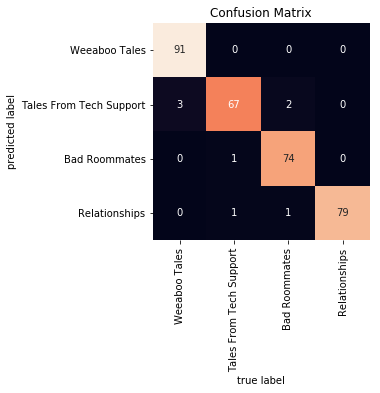

In [34]:
lucem_illud.plotConfusionMatrix(clf, dfTest)

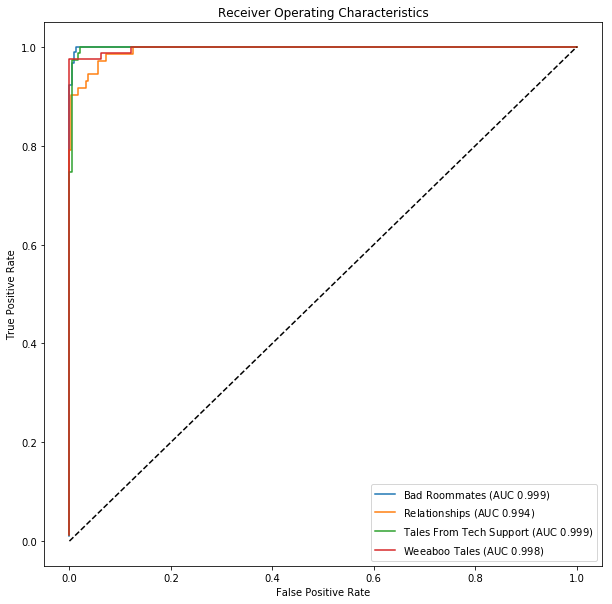

In [35]:
lucem_illud.plotMultiROC(clf, dfTest)

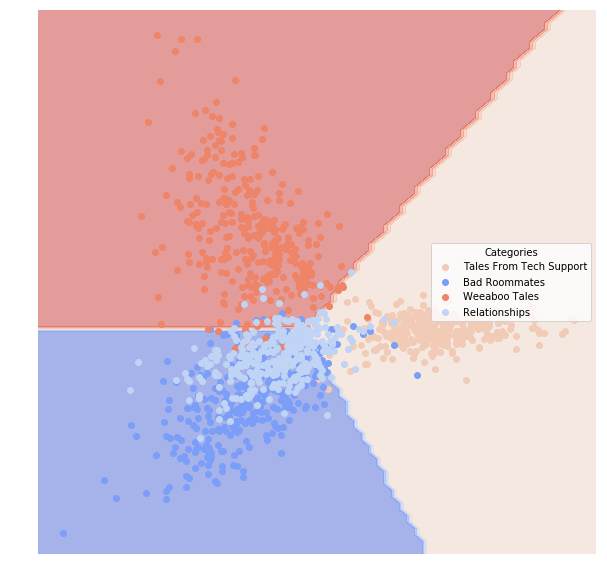

In [36]:
lucem_illud.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

For the first part, I found the following: Dataset 1 (andSplit, noise = .2), regression or neural net worked best. Dataset 2 (xorSplit, noise =.2), neural net worked best. Dataset 3 (targetSplit, noise =.2), bayes or knc worked best. Dataset 4 (random, noise =.4), neural net worked best, although it was not great. And finally, for Dataset 5 (andSplit, noise = .4), random forest worked best. While I was only able to get to 5 different datasets, this suggests that neural nets may be one of the stronger methods available, given that it was the best method for the majority of them. However, it wasn't always a strong result. Overall, this shows that different variables can drastically change the results one gets. 

For reddit, the best models were regression or svm linear. I can't tell if neural nets is either a really good model, or if it doesn't actually work. For NewsGroup, svm linear, neural net, and regression work best. For the small Senate corpus, most models worked, except for bayes, svm poly, and knc. For the large Senate corpus, svm p seemed to work best, given that a lot of the methods appear to not apply (?). My guess is that this has to do with the fact that there are more categories in the data. For the span, random forest appeared to work best, although there were two other methods that gave similar results. I find that the differences between svm linear and poly working are particularly interesting. Additionally, neural nets seems to be a good method in most, but not all cases.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [233]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

In [235]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator,category
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama,True
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama,True
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama,True
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama,True
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama,True
5,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Dec2007Obama192.txt,raw/Obama/10Dec2007Obama192.txt,Statement of Senator Barack Obama on Intern...,Obama,True
6,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jan2007Obama472.txt,raw/Obama/10Jan2007Obama472.txt,Legislation to Increase Availability and Us...,Obama,True
7,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jan2008Obama165.txt,raw/Obama/10Jan2008Obama165.txt,Obama Statement on the Flooding in East Cen...,Obama,True
8,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jul2008Obama28.txt,raw/Obama/10Jul2008Obama28.txt,Obama Green Applaud House Passage of Bill ...,Obama,True
9,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Jul2008Obama29.txt,raw/Obama/10Jul2008Obama29.txt,Obama Joins Schumer and McCaskill to Call o...,Obama,True


Let's turn the 'targetSenator' column into a binary category variable.

In [236]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [237]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: nltk.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

Let's split the data into training data and testing data.

In [238]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [239]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud.generateVecs()` will help with this but for now we are doing it the long way):

In [240]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [ ]:
TFVects.shape

We can save this in the dataframe to make things easier

In [ ]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [ ]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [ ]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

In [ ]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [ ]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [ ]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [ ]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

Slightly poorer. How about using more dimensions (40)?

In [ ]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Or still more (100)?

In [ ]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Or even more (200)!

In [ ]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

This is becoming ridiculous (400)!

In [ ]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [ ]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

Train the model using training data, and then test it on the testing data.

In [ ]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [ ]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

In [ ]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [ ]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [ ]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

Recall:

In [ ]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

F1-measure:

In [ ]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

Let's take a look at how well our posterior distribution looks relative to the truth.

In [ ]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [ ]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [ ]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

We can pick specific categories, and pull the relevant training and testing sets. 

In [ ]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Now we need to tokenize, and make a training and testing set:

In [ ]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: nltk.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [ ]:
print(len(train_ng_df))
print(len(test_ng_df))

We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [ ]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

...and save predictions to the dataframe:

In [ ]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

In [ ]:
train_ng_df[['category', 'nb_predict']][:10]

Looks pretty good, lets examine the testing dataset:

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

In [ ]:
lucem_illud.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [ ]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

In [ ]:
lucem_illud.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

In [ ]:
lucem_illud.plotregions(MultinomialNB_ng, test_ng_df)

We can also give the model a new string, not present in our data, and use the *predict* method to see if it can assign it to a category. Using our model to extend its classifications to new, uncoded data might be the primary purpose of a social science application. The words do have to be in the vocabulary, so don't be too creative :-)

In [ ]:
def predict_category(s, model, tfidf): #We just define a simple function here
    a = np.zeros((1, len(tfidf.vocabulary_)))
    for w in nltk.word_tokenize(s):
        try:
            a[:,tfidf.vocabulary_[lucem_illud.stemmer_basic.stem(w.lower())]] = 1
        except KeyError:
            print("Warning: '{}' not in vocabulary".format(w))
    return model.predict(a)[0]

In [ ]:
predict_category('rockets are cool', MultinomialNB_ng, TFVectorizer_ng)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [ ]:
#Data upload and prep

In [243]:
nytDF = pandas.read_csv('/Users/Enya/Desktop/content-analysis-2018/nytCorpusCluster.csv')

In [244]:
nytDF['election'] = [s == 7 for s in nytDF['cluster']]

print(len(nytDF))
print(nytDF[nytDF == True].count())

1952
article                0
date                   0
tokenized-article      0
cluster              714
election             176
dtype: int64


In [245]:
nytDF['normalized-article'] = nytDF['tokenized-article'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

In [251]:
holdBackFraction = .2
nyttrain_data_df, nyttest_data_df = lucem_illud.trainTestSplit(nytDF, holdBackFraction=holdBackFraction)

In [252]:
print(len(nyttrain_data_df))
print(len(nyttest_data_df))

1562
390


In [ ]:
#Logisitic Regression

In [254]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')

TFVects = TFVectorizer.fit_transform(nyttrain_data_df['article'])

In [255]:
TFVects.shape

(1562, 28377)

In [256]:
nyttrain_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [257]:
pca = sklearn.decomposition.PCA()
nytreduced_data = pca.fit_transform(np.stack(nyttrain_data_df['vect'], axis=0))

In [260]:
nyttrain_data_df['pca'] = [r for r in nytreduced_data]

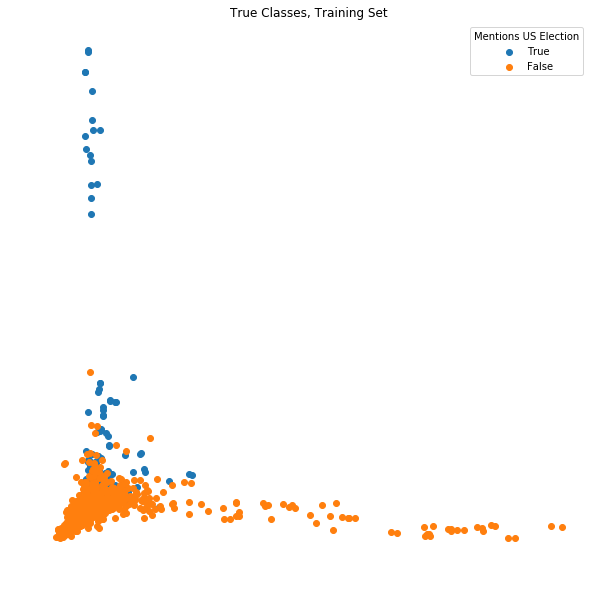

In [261]:
#Viualize
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(n_colors = 2)

#plot POW
a = np.stack(nyttrain_data_df[nyttrain_data_df['election']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot No Social
a = np.stack(nyttrain_data_df[nyttrain_data_df['election'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Mentions US Election')
plt.title('True Classes, Training Set')
plt.show()

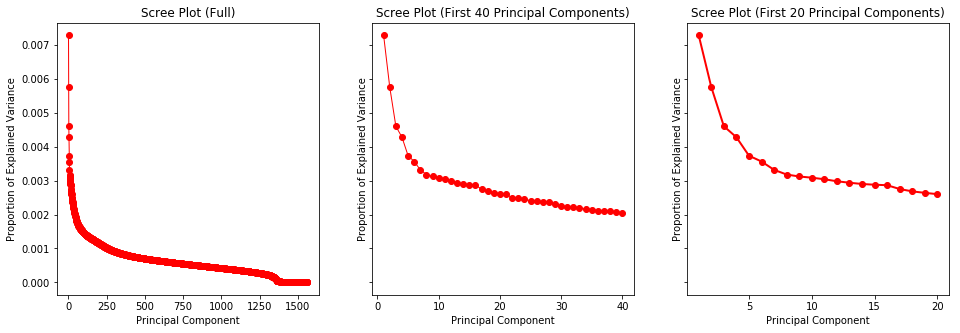

In [262]:
n = len(nyttrain_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(40) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:40], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 40 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 20 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [263]:
# Based on the graphs above, chose 7 PCA as covariates
nyttrain_data_df['pca_reduced_7'] = nyttrain_data_df['pca'].apply(lambda x: x[:7])

In [264]:
# Regression

logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(nyttrain_data_df['pca_reduced_7'], axis=0), nyttrain_data_df['election'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [265]:
logistic.score(np.stack(nyttrain_data_df['pca_reduced_7'], axis=0), nyttrain_data_df['election'])

0.9193341869398207

In [267]:
#Relatively good accuracy
#Below is the same on the test data, which is similar, but slightly better

#Create vectors
TFVects_test = TFVectorizer.transform(nyttest_data_df['article'])
nyttest_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
nytreduced_data_test = pca.transform(np.stack(nyttest_data_df['vect'], axis=0))
nyttest_data_df['pca'] = [r for r in nytreduced_data_test]
nyttest_data_df['pca_reduced_7'] = nyttest_data_df['pca'].apply(lambda x: x[:7])

#Test
logistic.score(np.stack(nyttest_data_df['pca_reduced_7'], axis=0), nyttest_data_df['election'])

0.9256410256410257

In [270]:
# Original corpus, which includes the all of the data

#Create vectors
TFVects_test = TFVectorizer.transform(nytDF['article'])
nytDF['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
nytreduced_data_test = pca.transform(np.stack(nytDF['vect'], axis=0))
nytDF['pca'] = [r for r in nytreduced_data_test]
nytDF['pca_reduced_7'] = nytDF['pca'].apply(lambda x: x[:7])

#Test
logistic.score(np.stack(nytDF['pca_reduced_7'], axis=0), nytDF['election'])

0.920594262295082

In [271]:
#With tf-idf
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l1')
logistic_l1.fit(np.stack(nyttrain_data_df['vect'], axis=0), nyttrain_data_df['election'])
print(logistic_l1.score(np.stack(nyttrain_data_df['vect'], axis=0), nyttrain_data_df['election']))

0.9526248399487837


In [ ]:
#tf-idf is slightly better

In [272]:
print(logistic_l1.score(np.stack(nyttest_data_df['vect'], axis=0), nyttest_data_df['election']))

0.958974358974359


In [ ]:
#So far that's the best 

In [ ]:
#Naives Bayes

In [273]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(nyttrain_data_df['vect'], axis=0), nyttrain_data_df['election'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [274]:
print("Training:")
print(naiveBayes.score(np.stack(nyttrain_data_df['vect'], axis=0), nyttrain_data_df['election']))
print("Testing:")
print(naiveBayes.score(np.stack(nyttest_data_df['vect'], axis=0), nyttest_data_df['election']))

Training:
0.9379001280409731
Testing:
0.9205128205128205


In [ ]:
#tf-idf still appears to be better than Naives Bayes 

In [275]:
nyttest_data_df['nb_predict'] = naiveBayes.predict(np.stack(nyttest_data_df['vect'], axis=0))
nyttest_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(nyttest_data_df['vect'], axis=0))[:,0] 

In [276]:
print("precision:")
print(sklearn.metrics.precision_score(nyttest_data_df['nb_predict'], nyttest_data_df['election']))
print("recall:")
print(sklearn.metrics.recall_score(nyttest_data_df['nb_predict'], nyttest_data_df['election']))
print("f1:")
print(sklearn.metrics.f1_score(nyttest_data_df['nb_predict'], nyttest_data_df['election']))

precision:
0.3
recall:
0.47368421052631576
f1:
0.3673469387755102


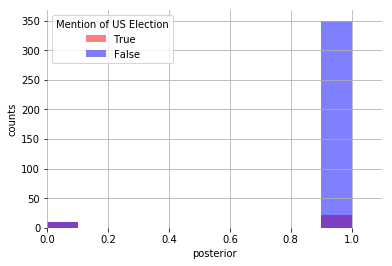

In [277]:
#Post Distributions
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
nyttest_data_df[nyttest_data_df['election'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
nyttest_data_df[nyttest_data_df['election'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Mention of US Election")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

In [278]:
#I'm honestly not sure how to read this - but the precision variable above seems very low

In [279]:
#Word Predictions

trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'US Election Mention' : [],
    'election_log_prob' : [],
    'No Mention' : [],
    'noelection_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['No Mention'].append(TFVectorizer.get_feature_names()[i])
    words_dict['noelection_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['US Election Mention'].append(TFVectorizer.get_feature_names()[i])
    words_dict['election_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,No Mention,US Election Mention,election_log_prob,noelection_log_prob
0,daughter,elections,-0.936769,-2.672035
1,makers,moscow,-0.971861,-2.672035
2,owned,elect,-0.989879,-2.672035
3,300,interference,-1.026920,-2.682292
4,anonymous,mrs,-1.190550,-2.682292
5,spot,presidency,-1.213023,-2.682292
6,round,ukraine,-1.213023,-2.703126
7,apple,kremlin,-1.236012,-2.713708
8,division,meddling,-1.236012,-2.713708
9,shift,fake,-1.259543,-2.713708


In [300]:
#I kept getting errors in this part
#Eventually I figured out that it was looking for category 
#By creating a 'category' column, I was able to run a Confusion Matrix with neural net
nyttest_data_df['category'] = nyttest_data_df['election']

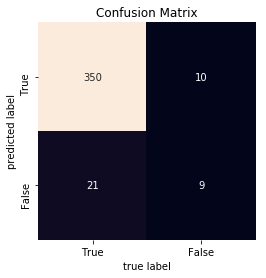

In [301]:
lucem_illud.plotConfusionMatrix(naiveBayes, nyttest_data_df)

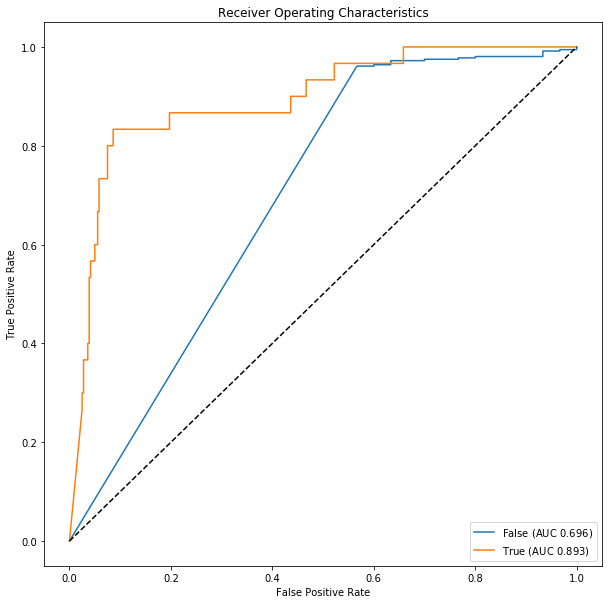

In [302]:
lucem_illud.plotMultiROC(naiveBayes, nyttest_data_df)

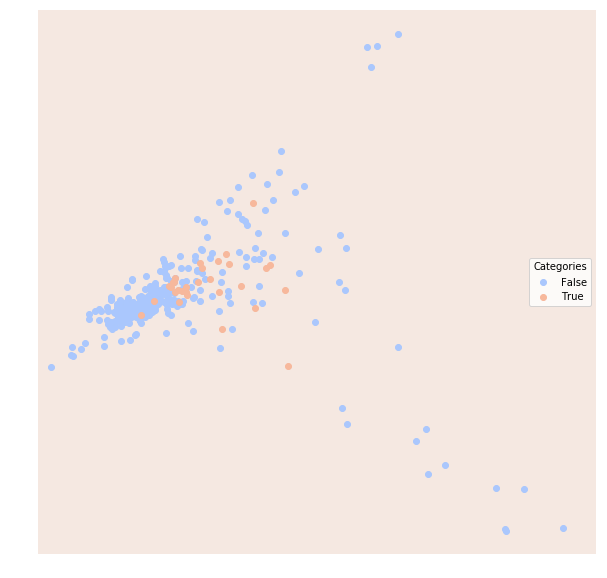

In [304]:
lucem_illud.plotregions(naiveBayes, nyttest_data_df)

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

In [ ]:
blobs_df = lucem_illud.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud.trainTestSplit(blobs_df)
lucem_illud.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

To see what's going on visually with the classification: 

In [ ]:
lucem_illud.plotregions(clf_tree, df_exampleTree_train)

In [ ]:
lucem_illud.evaluateClassifier(clf_tree, df_exampleTree_test)

Lets look at accuracy:

In [ ]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

What happens if we trim the tree?

In [ ]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [ ]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

In [ ]:
lucem_illud.plotregions(bag, df_exampleTree_test)

In [ ]:
lucem_illud.evaluateClassifier(bag, df_exampleTree_test)

In [ ]:
lucem_illud.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [307]:
nyt_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
nyt_tree.fit(np.stack(nyttrain_data_df['vect'], axis =0), nyttrain_data_df['election'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

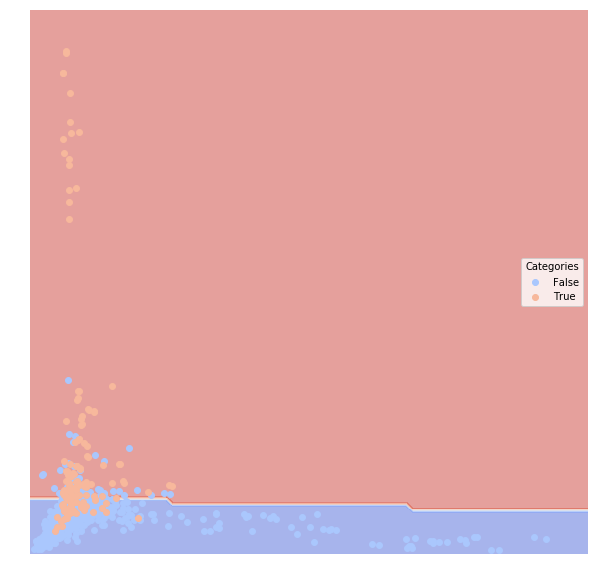

In [308]:
lucem_illud.plotregions(nyt_tree, nyttrain_data_df)

In [309]:
lucem_illud.evaluateClassifier(nyt_tree, nyttest_data_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
False,0.819444,0.970857,0.051282,0.972222,0.972222
True,0.819444,0.470085,0.051282,0.666667,0.666667


In [310]:
sklearn.metrics.accuracy_score(nyttest_data_df['category'],nyt_tree.predict(np.stack(nyttest_data_df['vect'], axis = 0)))

0.9487179487179487

In [ ]:
#Overall, this doesn't seem to be the best, Logistical Regression gave better results

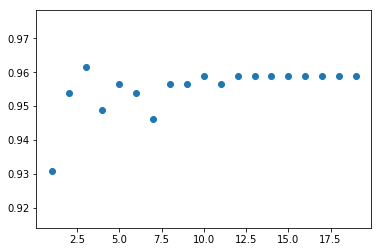

In [311]:
#Trimming
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(nyttrain_data_df['vect'], axis =0), nyttrain_data_df['category'])
    score = sklearn.metrics.accuracy_score(nyttest_data_df['category'], tree2.predict(np.stack(nyttest_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [ ]:
#it looks like at approximately 12 down, the shape is somewhat odd

In [319]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) 

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

In [320]:
bag.fit(np.stack(nyttrain_data_df['vect'], axis =0), nyttrain_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

KeyboardInterrupt: 

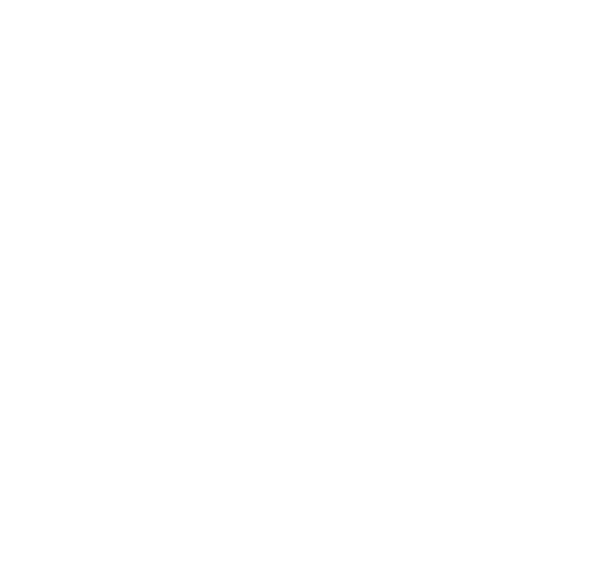

In [321]:
lucem_illud.plotregions(bag, nyttest_data_df)

In [ ]:
lucem_illud.evaluateClassifier(bag, nyttest_data_df)

In [ ]:
lucem_illud.plotConfusionMatrix(bag, nyttest_data_df)

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [ ]:
newsgroupsDF[:5]

Make a testing and training set:

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

And lets look at the testing data

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Let's produce another confusion matrix:

In [ ]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [318]:
n_neighbors = 10
weights="uniform"
nyt_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [ ]:
#tf-idf vectors
nyt_knearest.fit(np.stack(nyttrain_data_df['vect'], axis = 0), nyttrain_data_df['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_knearest, train_ng_df)

In [ ]:
#Test
print("Testing score:")
print(nyt_knearest.score(np.stack(nyttest_data_df['vect'], axis=0), nyttest_data_df['category']))

In [ ]:
lucem_illud.plotConfusionMatrix(nyt_knearest, nyttest_data_df)

In [ ]:
#lucem_illud.plotregions(nyt_knearest, nyttest_data_df)

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [ ]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: nltk.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic))

We will tf.idf the data to make our vectors:

In [ ]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [ ]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [ ]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

...and consider the results:

In [ ]:
lucem_illud.evaluateClassifier(clf_svm, test_redditDf)

In [ ]:
lucem_illud.plotConfusionMatrix(clf_svm, test_redditDf)

In [ ]:
lucem_illud.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

In [ ]:
lucem_illud.evaluateClassifier(clf_nn, test_redditDf)

In [ ]:
lucem_illud.plotConfusionMatrix(clf_nn, test_redditDf)

In [ ]:
lucem_illud.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [313]:
nyt_nn = sklearn.neural_network.MLPClassifier()
nyt_nn.fit(np.stack(nyttrain_data_df['vect'], axis=0), nyttrain_data_df['election'])
lucem_illud.evaluateClassifier(nyt_nn, nyttest_data_df)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
False,0.930556,0.988584,0.015385,0.988950,0.994444
True,0.930556,0.815018,0.015385,0.928571,0.866667


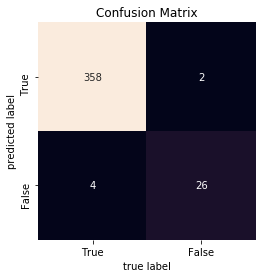

In [315]:
lucem_illud.plotConfusionMatrix(nyt_nn, nyttest_data_df)

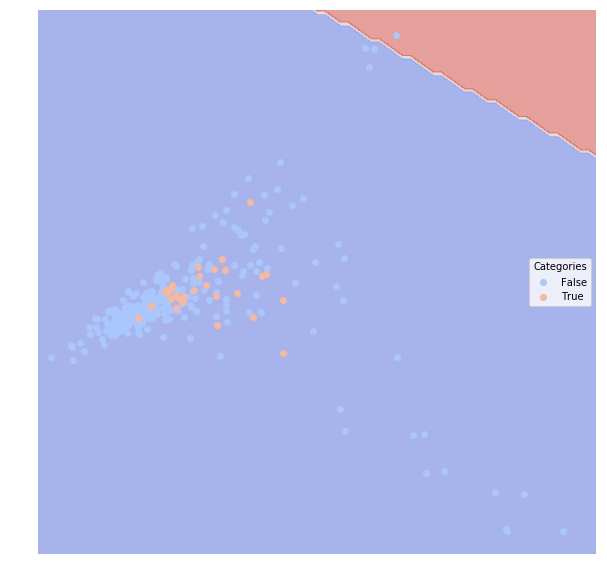

In [316]:
lucem_illud.plotregions(nyt_nn, nyttest_data_df)

In [ ]:
sklearn.metrics.accuracy_score(nyttest_data_df['category'],nyt_nn.predict(np.stack(nyttest_data_df['vect'], axis = 0)))

The code is taking a long time to run, but based on the results I have so far, the best method appears to be logistical regression